In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('dark_background')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('/content/sample_data/exp1_14drivers_14cars_dailyRoutes.csv')
data.head(5)

TIMESTAMP       MARK  MODEL  CAR_YEAR ENGINE_POWER AUTOMATIC VEHICLE_ID  \
0  1.502903e+12  chevrolet  agile    2011.0          1,4         n       car1   
1  1.502903e+12  chevrolet  agile    2011.0          1,4         n       car1   
2  1.502903e+12  chevrolet  agile    2011.0          1,4         n       car1   
3  1.502903e+12  chevrolet  agile    2011.0          1,4         n       car1   
4  1.502903e+12  chevrolet  agile    2011.0          1,4         n       car1   

   BAROMETRIC_PRESSURE(KPA)  ENGINE_COOLANT_TEMP FUEL_LEVEL  ... THROTTLE_POS  \
0                     100.0                 80.0     48,60%  ...          25%   
1                     100.0                 80.0     48,60%  ...          25%   
2                     100.0                 80.0     48,60%  ...          25%   
3                     100.0                 80.0     48,60%  ...          25%   
4                     100.0                 80.0     48,60%  ...          25%   

          DTC_NUMBER  TROUBLE_CODES  TIMING_ADVANCE EQUIV_RATIO   MIN HOURS  \
0  MIL is OFF0 codes            NaN           56,9%        1,0%  13.0  16.0   
1  MIL is OFF0 codes            NaN           56,5%        1,0%  13.0  16.0   
2  MIL is OFF0 codes            NaN           57,3%        1,0%  13.0  16.0   
3  MIL is OFF0 codes            NaN           56,5%        1,0%  13.0  16.0   
4  MIL is OFF0 codes            NaN           56,9%        1,0%  13.0  16.0   

   DAYS_OF_WEEK  MONTHS    YEAR  
0           2.0     8.0  2017.0  
1           2.0     8.0  2017.0  
2           2.0     8.0  2017.0  
3           2.0     8.0  2017.0  
4           2.0     8.0  2017.0  

[5 rows x 33 columns]

In [6]:
data["TIMESTAMP"].head()

0    1.502903e+12
1    1.502903e+12
2    1.502903e+12
3    1.502903e+12
4    1.502903e+12
Name: TIMESTAMP, dtype: float64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60439 entries, 0 to 60438
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIMESTAMP                    47514 non-null  float64
 1   MARK                         47459 non-null  object 
 2   MODEL                        47459 non-null  object 
 3   CAR_YEAR                     47459 non-null  float64
 4   ENGINE_POWER                 47459 non-null  object 
 5   AUTOMATIC                    47459 non-null  object 
 6   VEHICLE_ID                   47514 non-null  object 
 7   BAROMETRIC_PRESSURE(KPA)     10212 non-null  float64
 8   ENGINE_COOLANT_TEMP          33964 non-null  float64
 9   FUEL_LEVEL                   2994 non-null   object 
 10  ENGINE_LOAD                  30972 non-null  object 
 11  AMBIENT_AIR_TEMP             3619 non-null   float64
 12  ENGINE_RPM                   33859 non-null  float64
 13  INTAKE_MANIFOLD_

In [8]:
data.columns

Index(['TIMESTAMP', 'MARK', 'MODEL', 'CAR_YEAR', 'ENGINE_POWER', 'AUTOMATIC',
       'VEHICLE_ID', 'BAROMETRIC_PRESSURE(KPA)', 'ENGINE_COOLANT_TEMP',
       'FUEL_LEVEL', 'ENGINE_LOAD', 'AMBIENT_AIR_TEMP', 'ENGINE_RPM',
       'INTAKE_MANIFOLD_PRESSURE', 'MAF', 'LONG TERM FUEL TRIM BANK 2',
       'FUEL_TYPE', 'AIR_INTAKE_TEMP', 'FUEL_PRESSURE', 'SPEED',
       'SHORT TERM FUEL TRIM BANK 2', 'SHORT TERM FUEL TRIM BANK 1',
       'ENGINE_RUNTIME', 'THROTTLE_POS', 'DTC_NUMBER', 'TROUBLE_CODES',
       'TIMING_ADVANCE', 'EQUIV_RATIO', 'MIN', 'HOURS', 'DAYS_OF_WEEK',
       'MONTHS', 'YEAR'],
      dtype='object')

In [9]:
# For Each Car there will be constant asstes and changing one
Genral_const_List=['MARK','MODEL','CAR_YEAR','ENGINE_POWER','AUTOMATIC','VEHICLE_ID','FUEL_TYPE']
Affecting_List=['TIMESTAMP','BAROMETRIC_PRESSURE(KPA)','ENGINE_COOLANT_TEMP','FUEL_LEVEL','FUEL_LEVEL','AMBIENT_AIR_TEMP','ENGINE_RPM','INTAKE_MANIFOLD_PRESSURE','MAF',
                'LONG TERM FUEL TRIM BANK 2','AIR_INTAKE_TEMP','FUEL_PRESSURE','SPEED','SHORT TERM FUEL TRIM BANK 2', 'SHORT TERM FUEL TRIM BANK 1','ENGINE_RUNTIME','THROTTLE_POS','DTC_NUMBER'
               'TROUBLE_CODES','TIMING_ADVANCE','EQUIV_RATIO','MIN', 'HOURS', 'DAYS_OF_WEEK',
       'MONTHS', 'YEAR']
Sever_Columns=['FUEL_PRESSURE']
print(len(Genral_const_List)+len(Sever_Columns)+len(Affecting_List))

33


In [10]:
data['FUEL_PRESSURE'].value_counts()

FUEL_PRESSURE
48.0    138
Name: count, dtype: int64

In [11]:
def Investage_unique(data):
    for col in data.columns:
        df=pd.DataFrame(data[col])
        print(df.value_counts())
        print('************************************************')
Investage_unique(data)

TIMESTAMP   
1.503627e+12    2
1.499536e+12    1
1.503958e+12    1
1.503958e+12    1
1.503958e+12    1
               ..
1.503527e+12    1
1.503527e+12    1
1.503527e+12    1
1.503527e+12    1
1.505479e+12    1
Name: count, Length: 47513, dtype: int64
************************************************
MARK      
chevrolet     13617
toyota         7485
volkswagen     6364
peugeot        6018
fiat           5581
renault        2920
citroen        2060
nissan         1866
honda           903
ford            645
Name: count, dtype: int64
************************************************
MODEL     
agile         13617
corolla        7485
polo           6184
208_allure     6018
palio          5574
duster         2920
c3             2060
versa          1866
fit             903
focus           507
voyage          180
eco_sport       138
siena             7
Name: count, dtype: int64
************************************************
CAR_YEAR
2011.0      13617
2012.0       8494
2009.0       7485
2006

In [12]:
def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

print_unique_values(data)

Unique values in column 'TIMESTAMP': [1.50290250e+12 1.50290251e+12 1.50290252e+12 ... 1.50327631e+12
 1.50327632e+12            nan]
Unique values in column 'MARK': ['chevrolet' 'ford' 'honda' 'renault' nan 'volkswagen' 'fiat' 'toyota'
 'peugeot' 'nissan' 'citroen']
Unique values in column 'MODEL': ['agile' 'focus' 'fit' 'duster' nan 'polo' 'palio' 'corolla' 'eco_sport'
 '208_allure' 'siena' 'versa' 'c3' 'voyage']
Unique values in column 'CAR_YEAR': [2011. 2003. 2005. 2012.   nan 2006. 2009. 2010. 2015. 2016. 2013.]
Unique values in column 'ENGINE_POWER': ['1,4' '1,6' nan '1' '1,8']
Unique values in column 'AUTOMATIC': ['n' nan 's']
Unique values in column 'VEHICLE_ID': ['car1' 'car7' 'car3' 'car4' 'car5' 'car6' 'car8' 'car11' 'car2' 'car9'
 'car10' 'car12' 'car13' 'car14' nan]
Unique values in column 'BAROMETRIC_PRESSURE(KPA)': [100. 101.  nan  99.  96.  93.  90.  89.  91.  94.  97.  95.]
Unique values in column 'ENGINE_COOLANT_TEMP': [ 80.  81.  82.  77.  79.  78.  83.  84.  85.  86

In [13]:
Percentage_columns=['ENGINE_POWER','FUEL_LEVEL','MAF','LONG TERM FUEL TRIM BANK 2','SHORT TERM FUEL TRIM BANK 2','EQUIV_RATIO','ENGINE_LOAD','SHORT TERM FUEL TRIM BANK 1','THROTTLE_POS','TIMING_ADVANCE']
def handle_percentage_columns(df_cleaned1):
    global Percentage_columns
    df_cleaned=df_cleaned1.copy()
    for col in Percentage_columns:

        df_cleaned[col] = df_cleaned[col].str.replace('%', '', regex=False)  # Remove '%'
        df_cleaned[col] = df_cleaned[col].str.replace(',', '.', regex=False)  # Replace ',' with '.'
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
        print(df_cleaned[col].head(1))
    return df_cleaned
df_cleaned_formatted=handle_percentage_columns(data)

0    1.4
Name: ENGINE_POWER, dtype: float64
0    48.6
Name: FUEL_LEVEL, dtype: float64
0    4.49
Name: MAF, dtype: float64
0   NaN
Name: LONG TERM FUEL TRIM BANK 2, dtype: float64
0   NaN
Name: SHORT TERM FUEL TRIM BANK 2, dtype: float64
0    1.0
Name: EQUIV_RATIO, dtype: float64
0    33.3
Name: ENGINE_LOAD, dtype: float64
0   NaN
Name: SHORT TERM FUEL TRIM BANK 1, dtype: float64
0    25.0
Name: THROTTLE_POS, dtype: float64
0    56.9
Name: TIMING_ADVANCE, dtype: float64


In [14]:
df_cleaned_formatted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60439 entries, 0 to 60438
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIMESTAMP                    47514 non-null  float64
 1   MARK                         47459 non-null  object 
 2   MODEL                        47459 non-null  object 
 3   CAR_YEAR                     47459 non-null  float64
 4   ENGINE_POWER                 47459 non-null  float64
 5   AUTOMATIC                    47459 non-null  object 
 6   VEHICLE_ID                   47514 non-null  object 
 7   BAROMETRIC_PRESSURE(KPA)     10212 non-null  float64
 8   ENGINE_COOLANT_TEMP          33964 non-null  float64
 9   FUEL_LEVEL                   2994 non-null   float64
 10  ENGINE_LOAD                  30972 non-null  float64
 11  AMBIENT_AIR_TEMP             3619 non-null   float64
 12  ENGINE_RPM                   33859 non-null  float64
 13  INTAKE_MANIFOLD_

In [15]:
df_cleaned_formatted["ENGINE_RUNTIME"].head()

0    00:03:28
1    00:03:35
2    00:03:43
3    00:03:51
4    00:03:59
Name: ENGINE_RUNTIME, dtype: object

In [16]:
def extract_time_components(time_str):
    if isinstance(time_str, str):
        try:
            t = datetime.strptime(time_str, "%H:%M:%S")
            return pd.Series([t.hour, t.minute, t.second], index=['ER_Hours', 'ER_Minutes', 'ER_Seconds'])
        except ValueError:

            return pd.Series([None, None, None], index=['ER_Hours', 'ER_Minutes', 'ER_Seconds'])
    else:

        return pd.Series([None, None, None], index=['ER_Hours', 'ER_Minutes', 'ER_Seconds'])

time_components = df_cleaned_formatted['ENGINE_RUNTIME'].apply(extract_time_components)
df_cleaned_formatted = df_cleaned_formatted.drop(columns=['ENGINE_RUNTIME'])

df_cleaned_formatted = df_cleaned_formatted.join(time_components)

In [17]:
df_cleaned_formatted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60439 entries, 0 to 60438
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIMESTAMP                    47514 non-null  float64
 1   MARK                         47459 non-null  object 
 2   MODEL                        47459 non-null  object 
 3   CAR_YEAR                     47459 non-null  float64
 4   ENGINE_POWER                 47459 non-null  float64
 5   AUTOMATIC                    47459 non-null  object 
 6   VEHICLE_ID                   47514 non-null  object 
 7   BAROMETRIC_PRESSURE(KPA)     10212 non-null  float64
 8   ENGINE_COOLANT_TEMP          33964 non-null  float64
 9   FUEL_LEVEL                   2994 non-null   float64
 10  ENGINE_LOAD                  30972 non-null  float64
 11  AMBIENT_AIR_TEMP             3619 non-null   float64
 12  ENGINE_RPM                   33859 non-null  float64
 13  INTAKE_MANIFOLD_

In [18]:
def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

print_unique_values(df_cleaned_formatted)

Unique values in column 'TIMESTAMP': [1.50290250e+12 1.50290251e+12 1.50290252e+12 ... 1.50327631e+12
 1.50327632e+12            nan]
Unique values in column 'MARK': ['chevrolet' 'ford' 'honda' 'renault' nan 'volkswagen' 'fiat' 'toyota'
 'peugeot' 'nissan' 'citroen']
Unique values in column 'MODEL': ['agile' 'focus' 'fit' 'duster' nan 'polo' 'palio' 'corolla' 'eco_sport'
 '208_allure' 'siena' 'versa' 'c3' 'voyage']
Unique values in column 'CAR_YEAR': [2011. 2003. 2005. 2012.   nan 2006. 2009. 2010. 2015. 2016. 2013.]
Unique values in column 'ENGINE_POWER': [1.4 1.6 nan 1.  1.8]
Unique values in column 'AUTOMATIC': ['n' nan 's']
Unique values in column 'VEHICLE_ID': ['car1' 'car7' 'car3' 'car4' 'car5' 'car6' 'car8' 'car11' 'car2' 'car9'
 'car10' 'car12' 'car13' 'car14' nan]
Unique values in column 'BAROMETRIC_PRESSURE(KPA)': [100. 101.  nan  99.  96.  93.  90.  89.  91.  94.  97.  95.]
Unique values in column 'ENGINE_COOLANT_TEMP': [ 80.  81.  82.  77.  79.  78.  83.  84.  85.  86.  87.

# **_Handling Nulls_**

In [19]:
df_cleaned_formatted.isnull().sum()

TIMESTAMP                      12925
MARK                           12980
MODEL                          12980
CAR_YEAR                       12980
ENGINE_POWER                   12980
AUTOMATIC                      12980
VEHICLE_ID                     12925
BAROMETRIC_PRESSURE(KPA)       50227
ENGINE_COOLANT_TEMP            26475
FUEL_LEVEL                     57445
ENGINE_LOAD                    29467
AMBIENT_AIR_TEMP               56820
ENGINE_RPM                     26580
INTAKE_MANIFOLD_PRESSURE       35350
MAF                            48611
LONG TERM FUEL TRIM BANK 2     47369
FUEL_TYPE                      40434
AIR_INTAKE_TEMP                26087
FUEL_PRESSURE                  60301
SPEED                          13910
SHORT TERM FUEL TRIM BANK 2    47369
SHORT TERM FUEL TRIM BANK 1    22844
THROTTLE_POS                   26580
DTC_NUMBER                     13297
TROUBLE_CODES                  48514
TIMING_ADVANCE                 26277
EQUIV_RATIO                    48543
MIN                            12927
HOURS                          12927
DAYS_OF_WEEK                   12927
MONTHS                         12927
YEAR                           12927
ER_Hours                       48537
ER_Minutes                     48537
ER_Seconds                     48537
dtype: int64

**Some rows have all of their features set to null, making them meaningless for our purposes.**

In [20]:
len(df_cleaned_formatted[df_cleaned_formatted.isnull().all(axis=1)])

12925

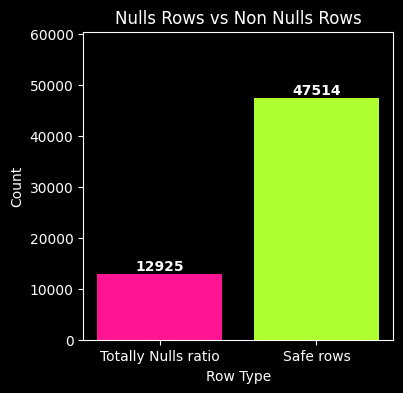

In [21]:
def Compare_Null(data):
    nulls_Number=len(data[data.isnull().all(axis=1)])
    Nun_nulls_Numbers=data.shape[0]-nulls_Number
    plt.figure(figsize=(4,4))
    bars=plt.bar(['Totally Nulls ratio','Safe rows'],[nulls_Number,Nun_nulls_Numbers],color=['#ff1493','#adff2f'])
    plt.xlabel('Row Type')
    plt.ylabel('Count')
    plt.title('Nulls Rows vs Non Nulls Rows')
    plt.ylim(0,len(data))
    plt.grid(False)
    for bar in bars:
        yval=bar.get_height()
        plt.text(bar.get_x()+bar.get_width()/2,
                 yval,
                 int(yval),
                 ha='center',
                 va='bottom',
                 fontsize=10,
                 fontweight='bold')
    plt.show()
Compare_Null(df_cleaned_formatted)

In [22]:
data_without_totally_null_rows=df_cleaned_formatted.copy()
data_without_totally_null_rows=data_without_totally_null_rows.dropna(how='all')
data_without_totally_null_rows.shape

(47514, 35)

In [23]:
data_without_totally_null_rows.isnull().sum()

TIMESTAMP                          0
MARK                              55
MODEL                             55
CAR_YEAR                          55
ENGINE_POWER                      55
AUTOMATIC                         55
VEHICLE_ID                         0
BAROMETRIC_PRESSURE(KPA)       37302
ENGINE_COOLANT_TEMP            13550
FUEL_LEVEL                     44520
ENGINE_LOAD                    16542
AMBIENT_AIR_TEMP               43895
ENGINE_RPM                     13655
INTAKE_MANIFOLD_PRESSURE       22425
MAF                            35686
LONG TERM FUEL TRIM BANK 2     34444
FUEL_TYPE                      27509
AIR_INTAKE_TEMP                13162
FUEL_PRESSURE                  47376
SPEED                            985
SHORT TERM FUEL TRIM BANK 2    34444
SHORT TERM FUEL TRIM BANK 1     9919
THROTTLE_POS                   13655
DTC_NUMBER                       372
TROUBLE_CODES                  35589
TIMING_ADVANCE                 13352
EQUIV_RATIO                    35618
MIN                                2
HOURS                              2
DAYS_OF_WEEK                       2
MONTHS                             2
YEAR                               2
ER_Hours                       35612
ER_Minutes                     35612
ER_Seconds                     35612
dtype: int64

# **_Deep Understanding of the datasets_**

**_DTC_Number and Troublecodes_**

In [24]:
temp_data=data_without_totally_null_rows.copy()

In [25]:
def print_rows_with_trouble_codes(df):
    filtered_df = df[df['TROUBLE_CODES'].notnull()]
    if 'DTC_NUMBER' in filtered_df.columns:
        print(filtered_df['DTC_NUMBER'])
        print(len(filtered_df['DTC_NUMBER']))
    else:
        print("Column 'DTC_NUMBER' does not exist in the DataFrame.")

df = pd.DataFrame(data)

print_rows_with_trouble_codes(temp_data)

17633    MIL is OFF1 codes
17634    MIL is OFF1 codes
17635    MIL is OFF1 codes
17636    MIL is OFF1 codes
17637    MIL is OFF1 codes
               ...        
47266    MIL is OFF0 codes
47270    MIL is OFF0 codes
47272    MIL is OFF0 codes
47273    MIL is OFF0 codes
47275    MIL is OFF0 codes
Name: DTC_NUMBER, Length: 11925, dtype: object
11925


**6 Rows doesn't have DTC so remove them**

In [26]:
def print_rows_with_nan_dtc_and_non_null_trouble_codes(df):
    filtered_df = df[df['DTC_NUMBER'].isna() & df['TROUBLE_CODES'].notna()]
    if 'TROUBLE_CODES' in filtered_df.columns:
        print(filtered_df['TROUBLE_CODES'])
        print(len(filtered_df['TROUBLE_CODES']))
    else:
        print("Column 'DTC_NUMBER' does not exist in the DataFrame.")
df = pd.DataFrame(data)

print_rows_with_nan_dtc_and_non_null_trouble_codes(temp_data)

20038              P0133
45570    P007EP2036P18D0
45857    P0079P2004P3000
46118    P0079C1004P3000
46276    P0079P2004P3000
46726    P0079C1004P3000
Name: TROUBLE_CODES, dtype: object
6


In [27]:
def drop_rows_with_nan_dtc_and_non_null_trouble_codes(df):
    mask = df['DTC_NUMBER'].isna() & df['TROUBLE_CODES'].notna() # 6 rows
    cleaned_df = df[~mask]
    return cleaned_df
temp_data = drop_rows_with_nan_dtc_and_non_null_trouble_codes(temp_data)

In [28]:
temp_data.isnull().sum()

TIMESTAMP                          0
MARK                              55
MODEL                             55
CAR_YEAR                          55
ENGINE_POWER                      55
AUTOMATIC                         55
VEHICLE_ID                         0
BAROMETRIC_PRESSURE(KPA)       37296
ENGINE_COOLANT_TEMP            13549
FUEL_LEVEL                     44514
ENGINE_LOAD                    16541
AMBIENT_AIR_TEMP               43889
ENGINE_RPM                     13655
INTAKE_MANIFOLD_PRESSURE       22424
MAF                            35680
LONG TERM FUEL TRIM BANK 2     34438
FUEL_TYPE                      27504
AIR_INTAKE_TEMP                13162
FUEL_PRESSURE                  47370
SPEED                            984
SHORT TERM FUEL TRIM BANK 2    34438
SHORT TERM FUEL TRIM BANK 1     9917
THROTTLE_POS                   13655
DTC_NUMBER                       366
TROUBLE_CODES                  35589
TIMING_ADVANCE                 13351
EQUIV_RATIO                    35612
MIN                                2
HOURS                              2
DAYS_OF_WEEK                       2
MONTHS                             2
YEAR                               2
ER_Hours                       35606
ER_Minutes                     35606
ER_Seconds                     35606
dtype: int64

# Handling unusual_conditions of the columns

In [29]:
def remove_rows_with_unusual_conditions(df, conditions_dict):
    combined_mask = pd.Series([True] * len(df), index=df.index)
    for feature_name, condition_func in conditions_dict.items():
        if feature_name in df.columns:
            feature_mask = df[feature_name].apply(condition_func)
            combined_mask &= ~feature_mask

    cleaned_df = df[combined_mask]

    return cleaned_df
def Engine_Load(value):
    return value < 0 or value > 100.

def	Engine_coolant_temperature(value):
    return value < -40. or value > 215.

def STFT_Bank(value): # for short tank 1,2 long tank 2
    return value < -100 or value > 99.2

def  Fuel_Pressure(value):
    return value < 0 or value > 765.

def Intake_manifold_absolute_pressure(value):
    return value < 0 or value > 255.

def Engine_speed(value):
    return value < 0 or value > 16383.75

def Vehicle_speed(value):
    return value<0 or value>255

def Intake_air_temperature(value):
    return value < -40. or value > 215.

def MAF(value):
    return value<0 or value> 655.35

def Throttle_position(value):
    return value<0 or value> 100.

def Fuel_Level(value):
    return value<0 or value> 100.

def Equtive_Ratio(value):
    return value<0 or value> 2.

def Ampiant_air_temperature(value):
    return value < -40. or value > 215.

conditions_dict = {
        'SPEED': Vehicle_speed,
        'ENGINE_COOLANT_TEMP':Engine_coolant_temperature,
        'FUEL_LEVEL':Fuel_Level,
        'ENGINE_LOAD':Engine_Load,
        'AMBIENT_AIR_TEMP':Ampiant_air_temperature,
        'ENGINE_RPM':Engine_speed,
        'INTAKE_MANIFOLD_PRESSURE':Intake_manifold_absolute_pressure,
        'MAF':MAF,
        'LONG TERM FUEL TRIM BANK 2':STFT_Bank,
        'AIR_INTAKE_TEMP':Intake_air_temperature,
        'FUEL_PRESSURE':Fuel_Pressure,
        'SHORT TERM FUEL TRIM BANK 2':STFT_Bank,
        'SHORT TERM FUEL TRIM BANK 1':STFT_Bank,
        'THROTTLE_POS':Throttle_position,
        'EQUIV_RATIO':Equtive_Ratio,
    }


safe_df = remove_rows_with_unusual_conditions(temp_data, conditions_dict)


In [30]:
temp_data.shape

(47508, 35)

In [31]:
safe_df.shape

(47508, 35)

**The data is safe from unreasonable**

In [32]:
def impute_dtc_and_trouble_codes(df):
    def impute_row(row):
        dtc = row['DTC_NUMBER']
        trouble_code = row['TROUBLE_CODES']
        if pd.isna(dtc):
            return pd.Series([0, 0], index=['DTC_NUMBER', 'TROUBLE_CODES'])
        if 'OFF' in str(dtc):
            number = extract_number(dtc)
            if number > 0:
                return pd.Series([1, 1], index=['DTC_NUMBER', 'TROUBLE_CODES'])

        if 'ON' in str(dtc):
            number = extract_number(dtc)
            if number > 0 :
               return pd.Series([1, 1], index=['DTC_NUMBER', 'TROUBLE_CODES'])


        return pd.Series([0, 0], index=['DTC_NUMBER', 'TROUBLE_CODES'])

    def extract_number(dtc):

        import re
        match = re.search(r'(\d+)', str(dtc))
        if match:
            return int(match.group(0))
        return 0


    df[['DTC_NUMBER', 'TROUBLE_CODES']] = df.apply(impute_row, axis=1)

    return df

df_imputed = impute_dtc_and_trouble_codes(safe_df)
print("\nImputed DataFrame:")
df_imputed.head()


Imputed DataFrame:


TIMESTAMP       MARK  MODEL  CAR_YEAR  ENGINE_POWER AUTOMATIC  \
0  1.502903e+12  chevrolet  agile    2011.0           1.4         n   
1  1.502903e+12  chevrolet  agile    2011.0           1.4         n   
2  1.502903e+12  chevrolet  agile    2011.0           1.4         n   
3  1.502903e+12  chevrolet  agile    2011.0           1.4         n   
4  1.502903e+12  chevrolet  agile    2011.0           1.4         n   

  VEHICLE_ID  BAROMETRIC_PRESSURE(KPA)  ENGINE_COOLANT_TEMP  FUEL_LEVEL  ...  \
0       car1                     100.0                 80.0        48.6  ...   
1       car1                     100.0                 80.0        48.6  ...   
2       car1                     100.0                 80.0        48.6  ...   
3       car1                     100.0                 80.0        48.6  ...   
4       car1                     100.0                 80.0        48.6  ...   

   TIMING_ADVANCE  EQUIV_RATIO   MIN  HOURS  DAYS_OF_WEEK  MONTHS    YEAR  \
0            56.9          1.0  13.0   16.0           2.0     8.0  2017.0   
1            56.5          1.0  13.0   16.0           2.0     8.0  2017.0   
2            57.3          1.0  13.0   16.0           2.0     8.0  2017.0   
3            56.5          1.0  13.0   16.0           2.0     8.0  2017.0   
4            56.9          1.0  13.0   16.0           2.0     8.0  2017.0   

   ER_Hours  ER_Minutes  ER_Seconds  
0       0.0         3.0        28.0  
1       0.0         3.0        35.0  
2       0.0         3.0        43.0  
3       0.0         3.0        51.0  
4       0.0         3.0        59.0  

[5 rows x 35 columns]

In [33]:
df_imputed.isnull().sum()

TIMESTAMP                          0
MARK                              55
MODEL                             55
CAR_YEAR                          55
ENGINE_POWER                      55
AUTOMATIC                         55
VEHICLE_ID                         0
BAROMETRIC_PRESSURE(KPA)       37296
ENGINE_COOLANT_TEMP            13549
FUEL_LEVEL                     44514
ENGINE_LOAD                    16541
AMBIENT_AIR_TEMP               43889
ENGINE_RPM                     13655
INTAKE_MANIFOLD_PRESSURE       22424
MAF                            35680
LONG TERM FUEL TRIM BANK 2     34438
FUEL_TYPE                      27504
AIR_INTAKE_TEMP                13162
FUEL_PRESSURE                  47370
SPEED                            984
SHORT TERM FUEL TRIM BANK 2    34438
SHORT TERM FUEL TRIM BANK 1     9917
THROTTLE_POS                   13655
DTC_NUMBER                         0
TROUBLE_CODES                      0
TIMING_ADVANCE                 13351
EQUIV_RATIO                    35612
MIN                                2
HOURS                              2
DAYS_OF_WEEK                       2
MONTHS                             2
YEAR                               2
ER_Hours                       35606
ER_Minutes                     35606
ER_Seconds                     35606
dtype: int64

# Delete the rows that doesn't have any values in ['MARK', 'MODEL', 'CAR_YEAR', 'ENGINE_POWER', 'AUTOMATIC']

In [34]:
def find_and_remove_common_null_indices(df, columns):
    common_indices = set(df[df[columns[0]].isna()].index)


    for column in columns[1:]:
        if column in df.columns:
            null_indices = set(df[df[column].isna()].index)
            common_indices.intersection_update(null_indices)
        else:
            print(f"Column '{column}' does not exist in the DataFrame")
            return df

    if common_indices:
        print(f"Indices with null values in all specified columns: {len(sorted(common_indices))}")

        df_cleaned = df.drop(index=common_indices)
        return df_cleaned
    else:
        print("No common indices found where all specified columns have null values")
        return df

columns_to_check = ['MARK', 'MODEL', 'CAR_YEAR', 'ENGINE_POWER', 'AUTOMATIC']

df_imputed = find_and_remove_common_null_indices(df_imputed, columns_to_check)

Indices with null values in all specified columns: 55


#Delete the rows that doesn't have any values in ['MIN', 'HOURS', 'DAYS_OF_WEEK', 'MONTHS', 'YEAR']

In [35]:
def find_and_remove_common_null_indices2(df, columns):
    common_indices = set(df[df[columns[0]].isna()].index)
    for column in columns[1:]:
        if column in df.columns:
            null_indices = set(df[df[column].isna()].index)
            common_indices.intersection_update(null_indices)
        else:
            print(f"Column '{column}' does not exist in the DataFrame")
            return df

    if common_indices:
        print(f"Indices with null values in all specified columns: {len(sorted(common_indices))}")

        df_cleaned = df.drop(index=common_indices)
        return df_cleaned
    else:
        print("No common indices found where all specified columns have null values")
        return df

columns_to_check = ['MIN', 'HOURS', 'DAYS_OF_WEEK', 'MONTHS', 'YEAR']

df_imputed = find_and_remove_common_null_indices2(df_imputed, columns_to_check)

Indices with null values in all specified columns: 2


#Delete the rows that have timestamp and car model only

In [36]:
def count_and_remove_rows_with_all_nulls(df, columns):
    if not columns:
        print("No columns specified.")
        return 0, df

    missing_columns = [col for col in columns if col not in df.columns]
    if missing_columns:
        print(f"Columns missing from DataFrame: {missing_columns}")
        return 0, df

    # Create a mask for rows where all specified columns are null
    all_nulls_mask = df[columns].isna().all(axis=1)

    # Count rows where all specified columns are null
    count_all_nulls = all_nulls_mask.sum()

    # Print the count of such rows
    print(f"Number of rows where all specified columns are null: {count_all_nulls}")

    # Remove these rows from the DataFrame
    df_cleaned = df[~all_nulls_mask]

    return count_all_nulls, df_cleaned


# Example usage
columns_to_check = [
    'BAROMETRIC_PRESSURE(KPA)', 'ENGINE_COOLANT_TEMP', 'FUEL_LEVEL', 'ENGINE_LOAD',
    'AMBIENT_AIR_TEMP', 'ENGINE_RPM', 'INTAKE_MANIFOLD_PRESSURE', 'MAF',
    'LONG TERM FUEL TRIM BANK 2', 'AIR_INTAKE_TEMP', 'FUEL_PRESSURE',
    'SPEED', 'SHORT TERM FUEL TRIM BANK 2', 'SHORT TERM FUEL TRIM BANK 1',
    'THROTTLE_POS', 'TIMING_ADVANCE', 'EQUIV_RATIO','ER_Hours',
'ER_Minutes',
'ER_Seconds'
]

# Assuming df_imputed is your DataFrame
count, df_imputed = count_and_remove_rows_with_all_nulls(df_imputed, columns_to_check)

Number of rows where all specified columns are null: 294


#Correlation Matrix

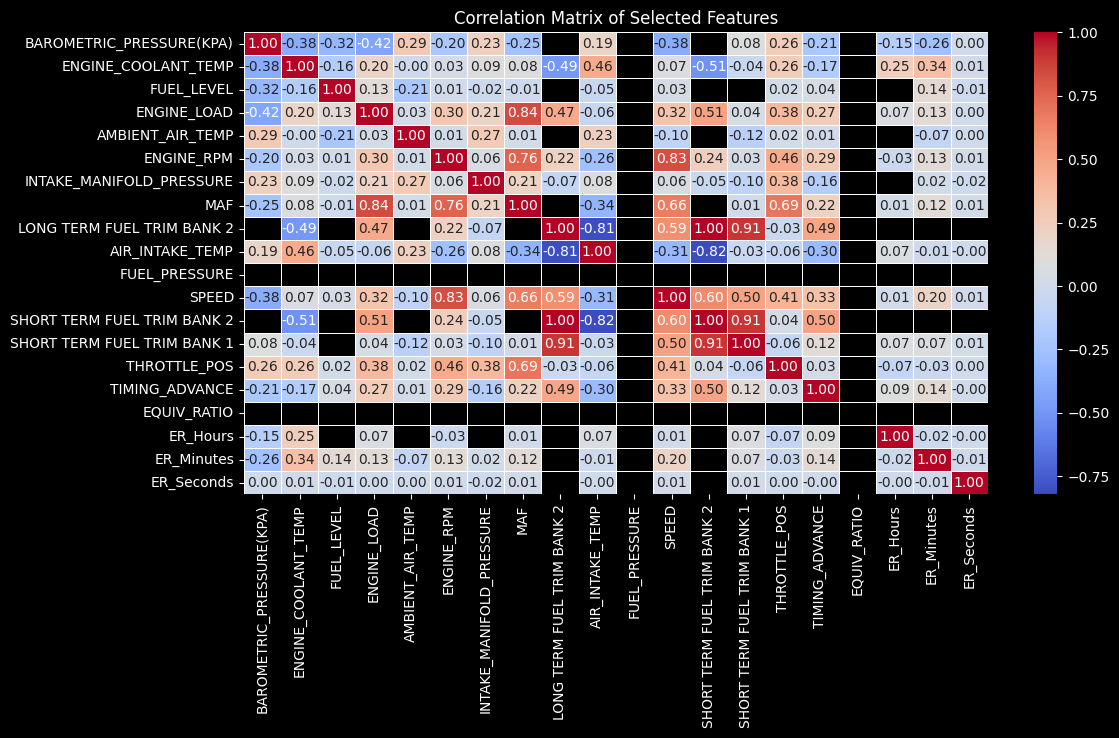

In [37]:
correlation_matrix = df_imputed[columns_to_check].corr()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [38]:
df_imputed.isnull().sum()

TIMESTAMP                          0
MARK                               0
MODEL                              0
CAR_YEAR                           0
ENGINE_POWER                       0
AUTOMATIC                          0
VEHICLE_ID                         0
BAROMETRIC_PRESSURE(KPA)       36947
ENGINE_COOLANT_TEMP            13255
FUEL_LEVEL                     44163
ENGINE_LOAD                    16247
AMBIENT_AIR_TEMP               43538
ENGINE_RPM                     13361
INTAKE_MANIFOLD_PRESSURE       22128
MAF                            35331
LONG TERM FUEL TRIM BANK 2     34087
FUEL_TYPE                      27154
AIR_INTAKE_TEMP                12868
FUEL_PRESSURE                  47019
SPEED                            687
SHORT TERM FUEL TRIM BANK 2    34087
SHORT TERM FUEL TRIM BANK 1     9623
THROTTLE_POS                   13361
DTC_NUMBER                         0
TROUBLE_CODES                      0
TIMING_ADVANCE                 13057
EQUIV_RATIO                    35263
MIN                                0
HOURS                              0
DAYS_OF_WEEK                       0
MONTHS                             0
YEAR                               0
ER_Hours                       35257
ER_Minutes                     35257
ER_Seconds                     35257
dtype: int64

In [39]:
missing_percentage = df_imputed.isna().mean() * 100
print("Missing Data Percentage:")
print(missing_percentage)

Missing Data Percentage:
TIMESTAMP                       0.000000
MARK                            0.000000
MODEL                           0.000000
CAR_YEAR                        0.000000
ENGINE_POWER                    0.000000
AUTOMATIC                       0.000000
VEHICLE_ID                      0.000000
BAROMETRIC_PRESSURE(KPA)       78.348920
ENGINE_COOLANT_TEMP            28.108234
FUEL_LEVEL                     93.650996
ENGINE_LOAD                    34.452997
AMBIENT_AIR_TEMP               92.325636
ENGINE_RPM                     28.333015
INTAKE_MANIFOLD_PRESSURE       46.924105
MAF                            74.922069
LONG TERM FUEL TRIM BANK 2     72.284072
FUEL_TYPE                      57.582119
AIR_INTAKE_TEMP                27.287571
FUEL_PRESSURE                  99.707361
SPEED                           1.456836
SHORT TERM FUEL TRIM BANK 2    72.284072
SHORT TERM FUEL TRIM BANK 1    20.406302
THROTTLE_POS                   28.333015
DTC_NUMBER                      

In [40]:
df_imputed.shape

(47157, 35)

 # **Nulls Ratio in every feature**

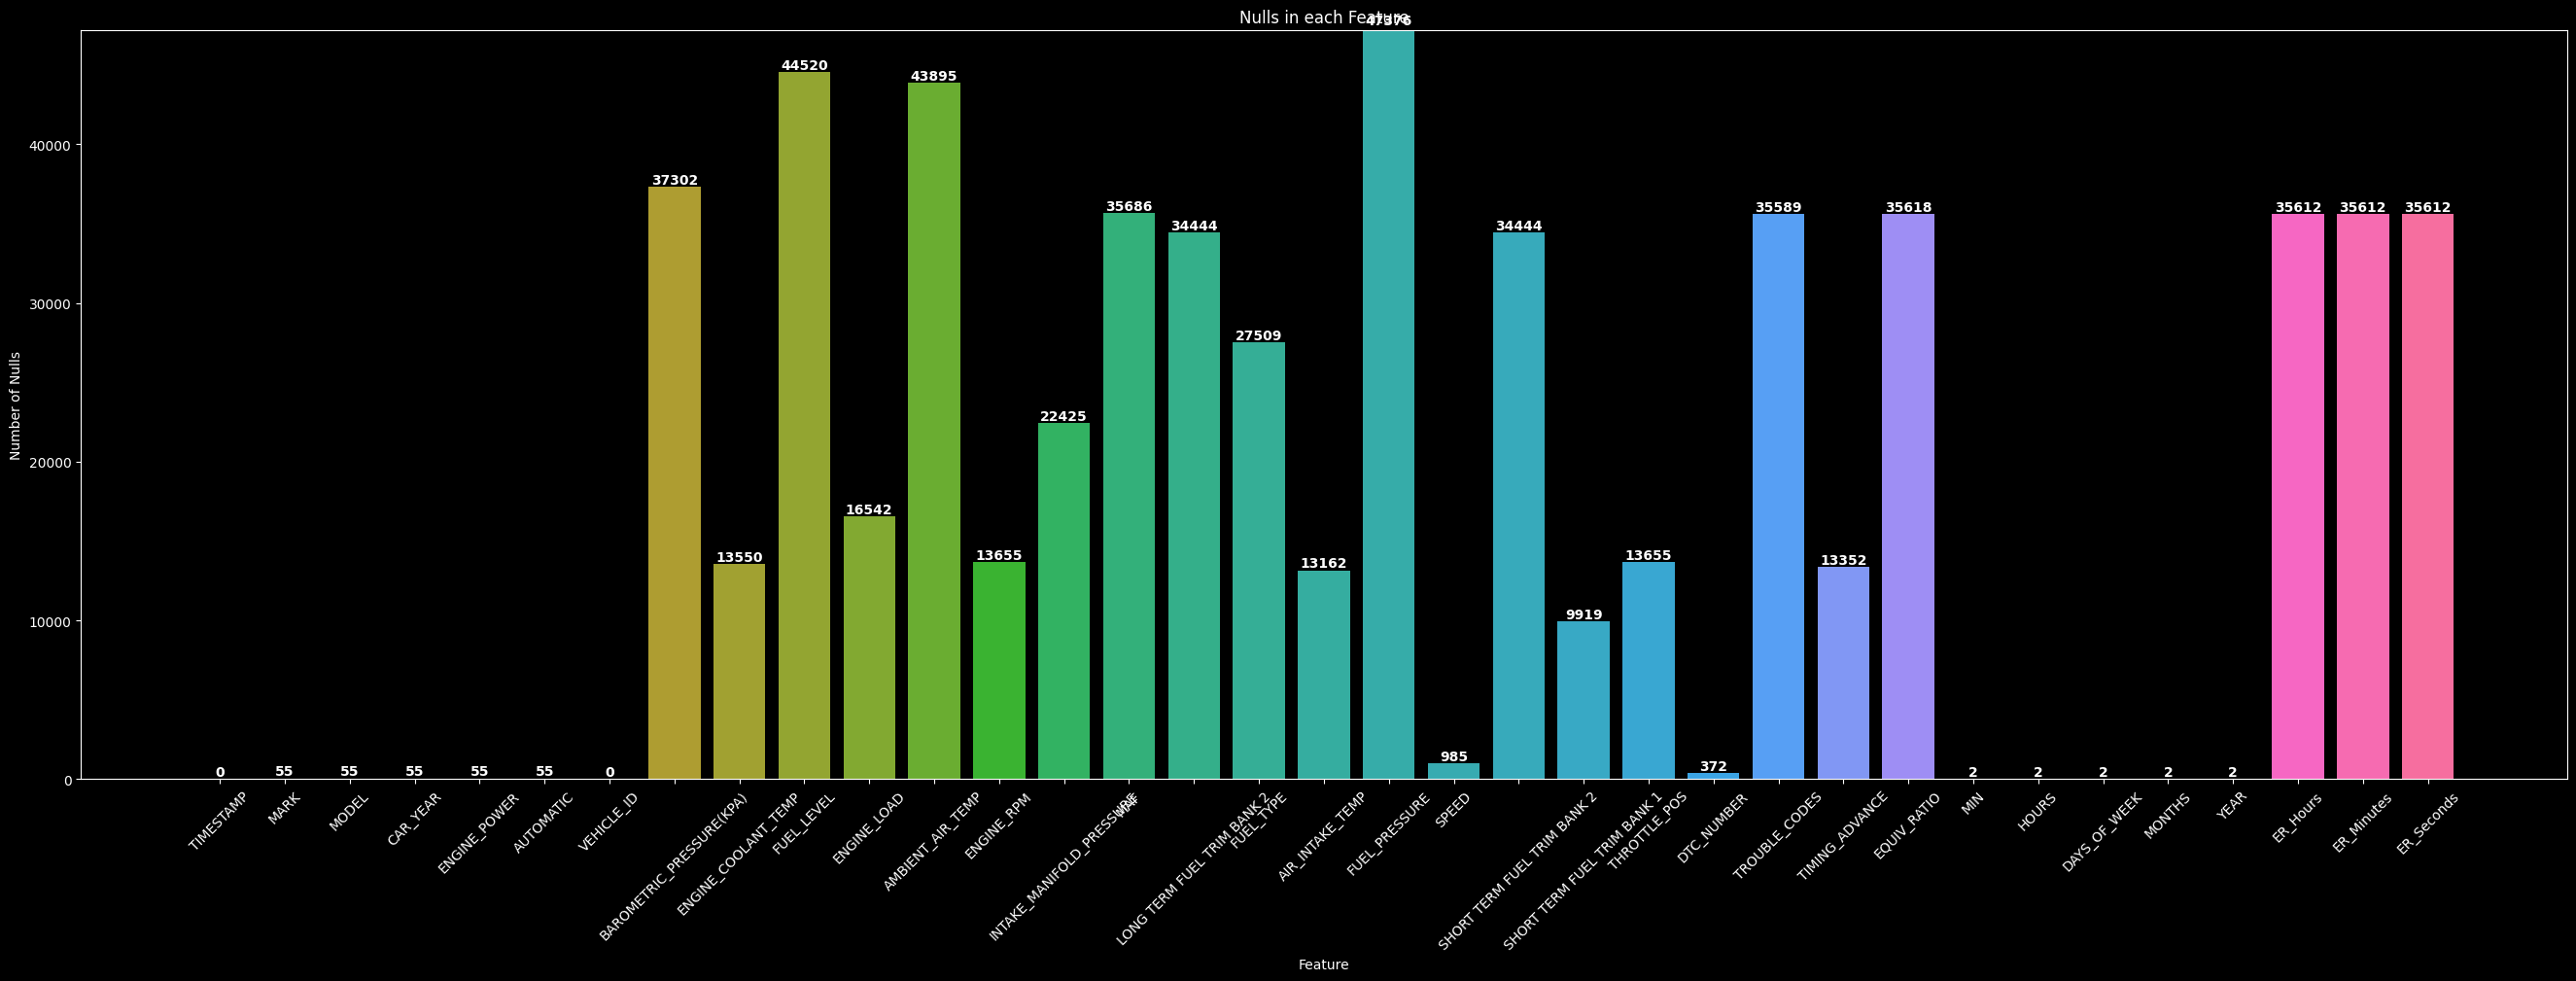

In [41]:
def Compare_Null_part2(data):
    nulls=data_without_totally_null_rows.isnull().sum()
    palette=sns.color_palette('husl',len(nulls))
    plt.figure(figsize=(33,10))
    bars=plt.bar(nulls.index,nulls.values,color=palette)
    plt.xlabel('Feature')
    plt.ylabel('Number of Nulls')
    plt.title('Nulls in each Feature')
    plt.ylim(0,len(data))
    plt.grid(False)
    plt.xticks(rotation=45)
    for bar in bars:
        yval=bar.get_height()
        plt.text(bar.get_x()+bar.get_width()/2,
                 yval,
                 int(yval),
                 ha='center',
                 va='bottom',
                 fontsize=10,
                 fontweight='bold')
    plt.show()
Compare_Null_part2(df_imputed)

In [42]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47157 entries, 0 to 47513
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIMESTAMP                    47157 non-null  float64
 1   MARK                         47157 non-null  object 
 2   MODEL                        47157 non-null  object 
 3   CAR_YEAR                     47157 non-null  float64
 4   ENGINE_POWER                 47157 non-null  float64
 5   AUTOMATIC                    47157 non-null  object 
 6   VEHICLE_ID                   47157 non-null  object 
 7   BAROMETRIC_PRESSURE(KPA)     10210 non-null  float64
 8   ENGINE_COOLANT_TEMP          33902 non-null  float64
 9   FUEL_LEVEL                   2994 non-null   float64
 10  ENGINE_LOAD                  30910 non-null  float64
 11  AMBIENT_AIR_TEMP             3619 non-null   float64
 12  ENGINE_RPM                   33796 non-null  float64
 13  INTAKE_MANIFOLD_PRESS

# **_Handling Nulls_ by doing relations**

**_Group1: Severe Features that need to be totally removed or has no realtion with any other feature_**

In [43]:
Severe_CatFeatures=['FUEL_PRESSURE','EQUIV_RATIO']# will be totally removed
#Middle_NumFeatures=['BAROMETRIC_PRESSURE(KPA)','AMBIENT_AIR_TEMP','CAR_YEAR'] # Mode Imputation

In [44]:
df_dropped = df_imputed.copy()
#df_dropped.shape
df_dropped = df_dropped.drop(columns=Severe_CatFeatures)

In [45]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47157 entries, 0 to 47513
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIMESTAMP                    47157 non-null  float64
 1   MARK                         47157 non-null  object 
 2   MODEL                        47157 non-null  object 
 3   CAR_YEAR                     47157 non-null  float64
 4   ENGINE_POWER                 47157 non-null  float64
 5   AUTOMATIC                    47157 non-null  object 
 6   VEHICLE_ID                   47157 non-null  object 
 7   BAROMETRIC_PRESSURE(KPA)     10210 non-null  float64
 8   ENGINE_COOLANT_TEMP          33902 non-null  float64
 9   FUEL_LEVEL                   2994 non-null   float64
 10  ENGINE_LOAD                  30910 non-null  float64
 11  AMBIENT_AIR_TEMP             3619 non-null   float64
 12  ENGINE_RPM                   33796 non-null  float64
 13  INTAKE_MANIFOLD_PRESS

**_Group2: Features that needs need Median or Mean or Mode Imputation (Strong one that can help weak features)_**

**Here i will impute the features that has nulls <50%**

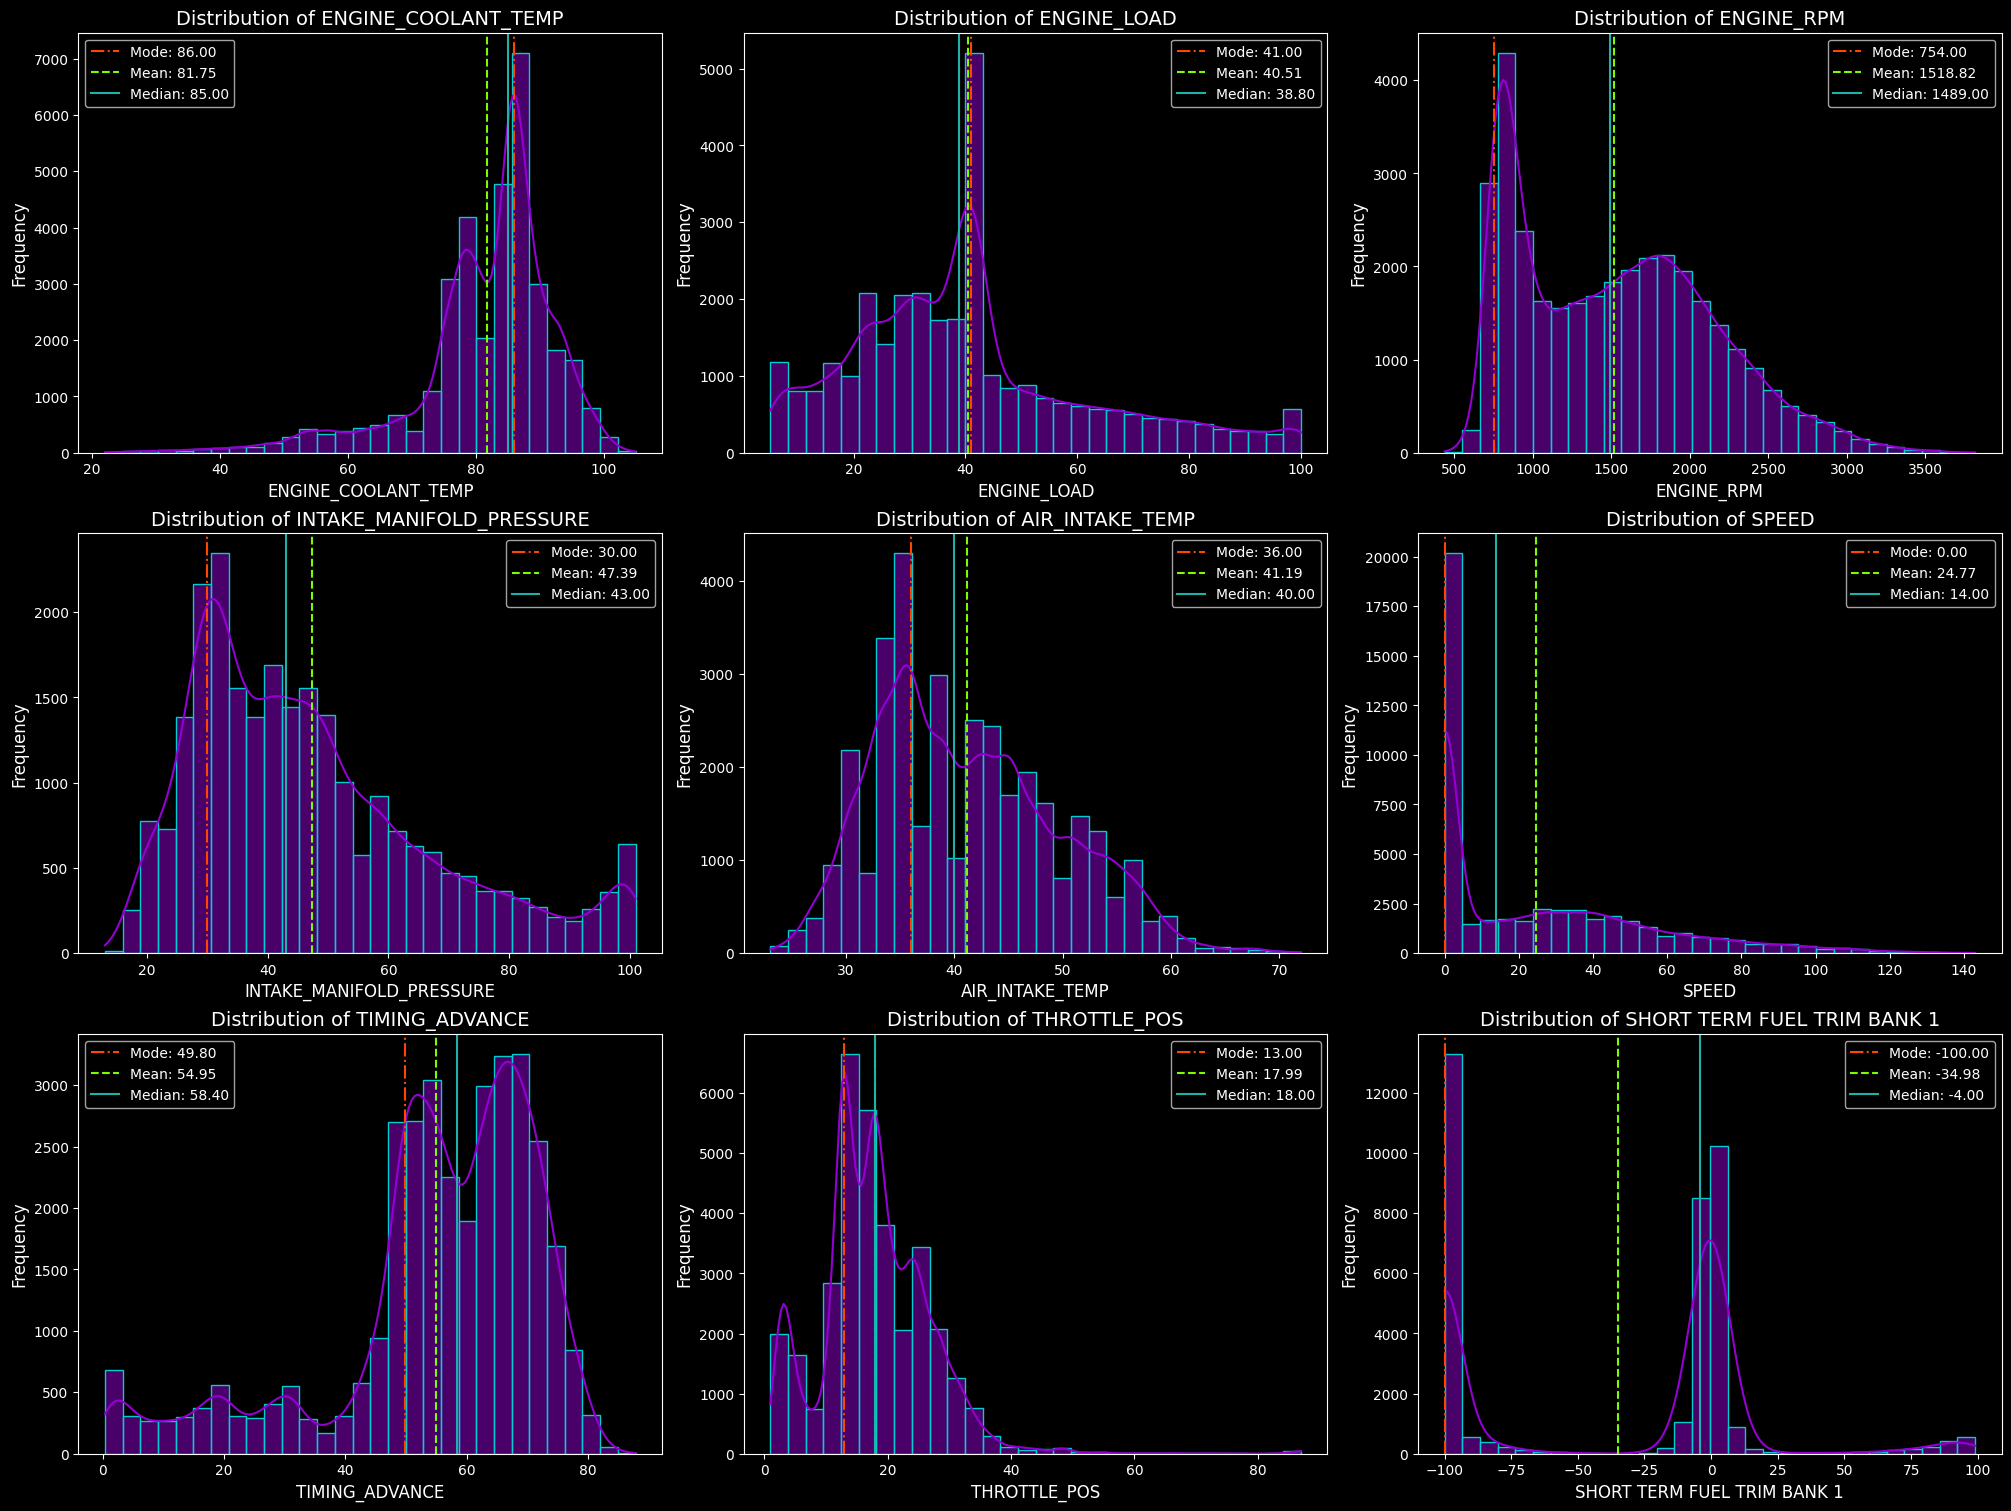

In [46]:
Imputed_numerical_features = [
    'ENGINE_COOLANT_TEMP', 'ENGINE_LOAD', 'ENGINE_RPM', 'INTAKE_MANIFOLD_PRESSURE',
    'AIR_INTAKE_TEMP', 'SPEED', 'TIMING_ADVANCE', 'THROTTLE_POS', 'SHORT TERM FUEL TRIM BANK 1'
]

fig, axes = plt.subplots(3, 3, figsize=(20, 15), constrained_layout=True)

for i, feature in enumerate(Imputed_numerical_features):
    row, col = divmod(i, 3)
    ax = axes[row, col]


    sns.histplot(df_dropped[feature], bins=30, kde=True, color='#9400d3', edgecolor='#00ced1', ax=ax)


    mean_value = df_dropped[feature].mean()
    median_value = df_dropped[feature].median()
    mode_series = df_dropped[feature].mode()

    if not mode_series.empty:
        mode_value = mode_series[0]
        ax.axvline(mode_value, color='#ff4500', linestyle='-.', label=f'Mode: {mode_value:.2f}')

    ax.axvline(mean_value, color='#7cfc00', linestyle='--', label=f'Mean: {mean_value:.2f}')
    ax.axvline(median_value, color='#20b2aa', linestyle='-', label=f'Median: {median_value:.2f}')

    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend()


for j in range(len(Imputed_numerical_features), 9):
    fig.delaxes(axes.flatten()[j])

plt.show()

**not actually clear we want to try after imputation what will be the effect of that?**

{'ENGINE_COOLANT_TEMP': 'Median', 'ENGINE_LOAD': 'Median', 'ENGINE_RPM': 'Median', 'INTAKE_MANIFOLD_PRESSURE': 'Median', 'AIR_INTAKE_TEMP': 'Median', 'SPEED': 'Median', 'TIMING_ADVANCE': 'Median', 'THROTTLE_POS': 'Median', 'SHORT TERM FUEL TRIM BANK 1': 'Median'}


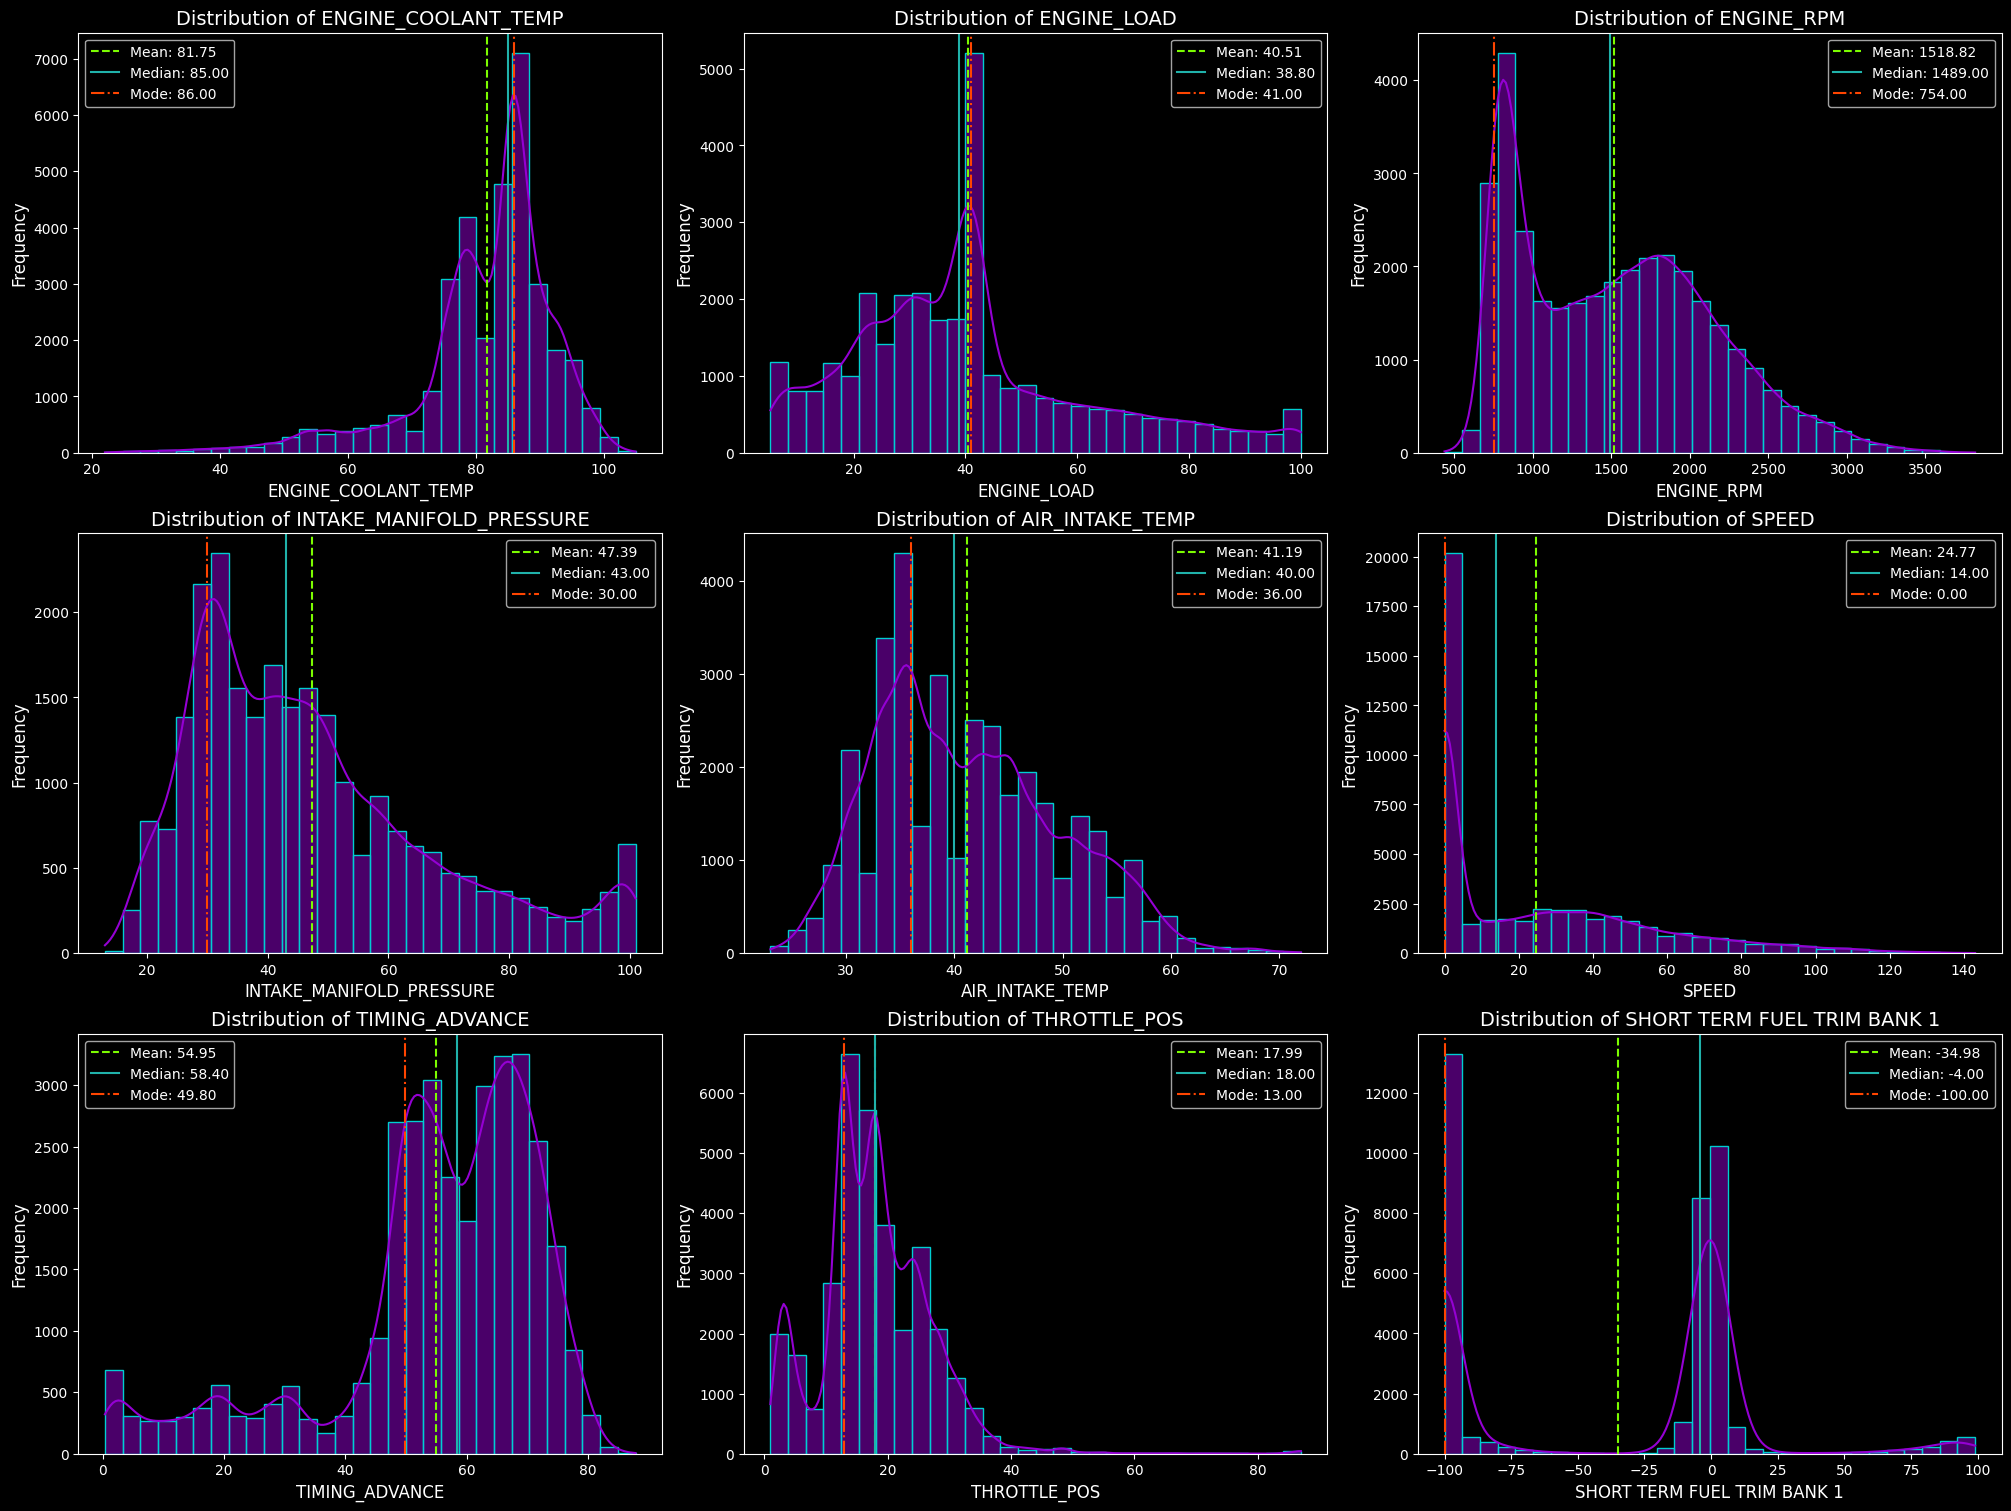

In [47]:
features_to_impute = [feature for feature in Imputed_numerical_features if df_dropped[feature].isnull().mean() < 0.5]
from scipy.stats import skew, kurtosis
imputation_strategies = {}

for feature in features_to_impute:
    feature_data = df_dropped[feature].dropna()
    mean_value = feature_data.mean()
    median_value = feature_data.median()
    mode_value = feature_data.mode()[0] if not feature_data.mode().empty else np.nan
    skewness = skew(feature_data)
    kurt = kurtosis(feature_data)

    if abs(mean_value - median_value) < 0.01 and abs(skewness) < 0.5:
        imputation_strategies[feature] = 'Mean'
    elif abs(mean_value - median_value) > 0.01 or abs(skewness) > 0.5:
        imputation_strategies[feature] = 'Median'
    else:
        imputation_strategies[feature] = 'Mode'

print(imputation_strategies)

# Plot histograms and lines for decision making
fig, axes = plt.subplots(3, 3, figsize=(20, 15), constrained_layout=True)

for i, feature in enumerate(features_to_impute):
    row, col = divmod(i, 3)
    ax = axes[row, col]

    sns.histplot(df_dropped[feature], bins=30, kde=True, color='#9400d3', edgecolor='#00ced1', ax=ax)

    mean_value = df_dropped[feature].mean()
    median_value = df_dropped[feature].median()
    mode_series = df_dropped[feature].mode()
    mode_value = mode_series[0] if not mode_series.empty else np.nan

    ax.axvline(mean_value, color='#7cfc00', linestyle='--', label=f'Mean: {mean_value:.2f}')
    ax.axvline(median_value, color='#20b2aa', linestyle='-', label=f'Median: {median_value:.2f}')
    if not pd.isna(mode_value):
        ax.axvline(mode_value, color='#ff4500', linestyle='-.', label=f'Mode: {mode_value:.2f}')

    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend()

# Turn off unused subplots
for j in range(len(features_to_impute), 9):
    fig.delaxes(axes.flatten()[j])

plt.show()

**Seems wierdo that all has same suitable method but what if we try by plotting also**

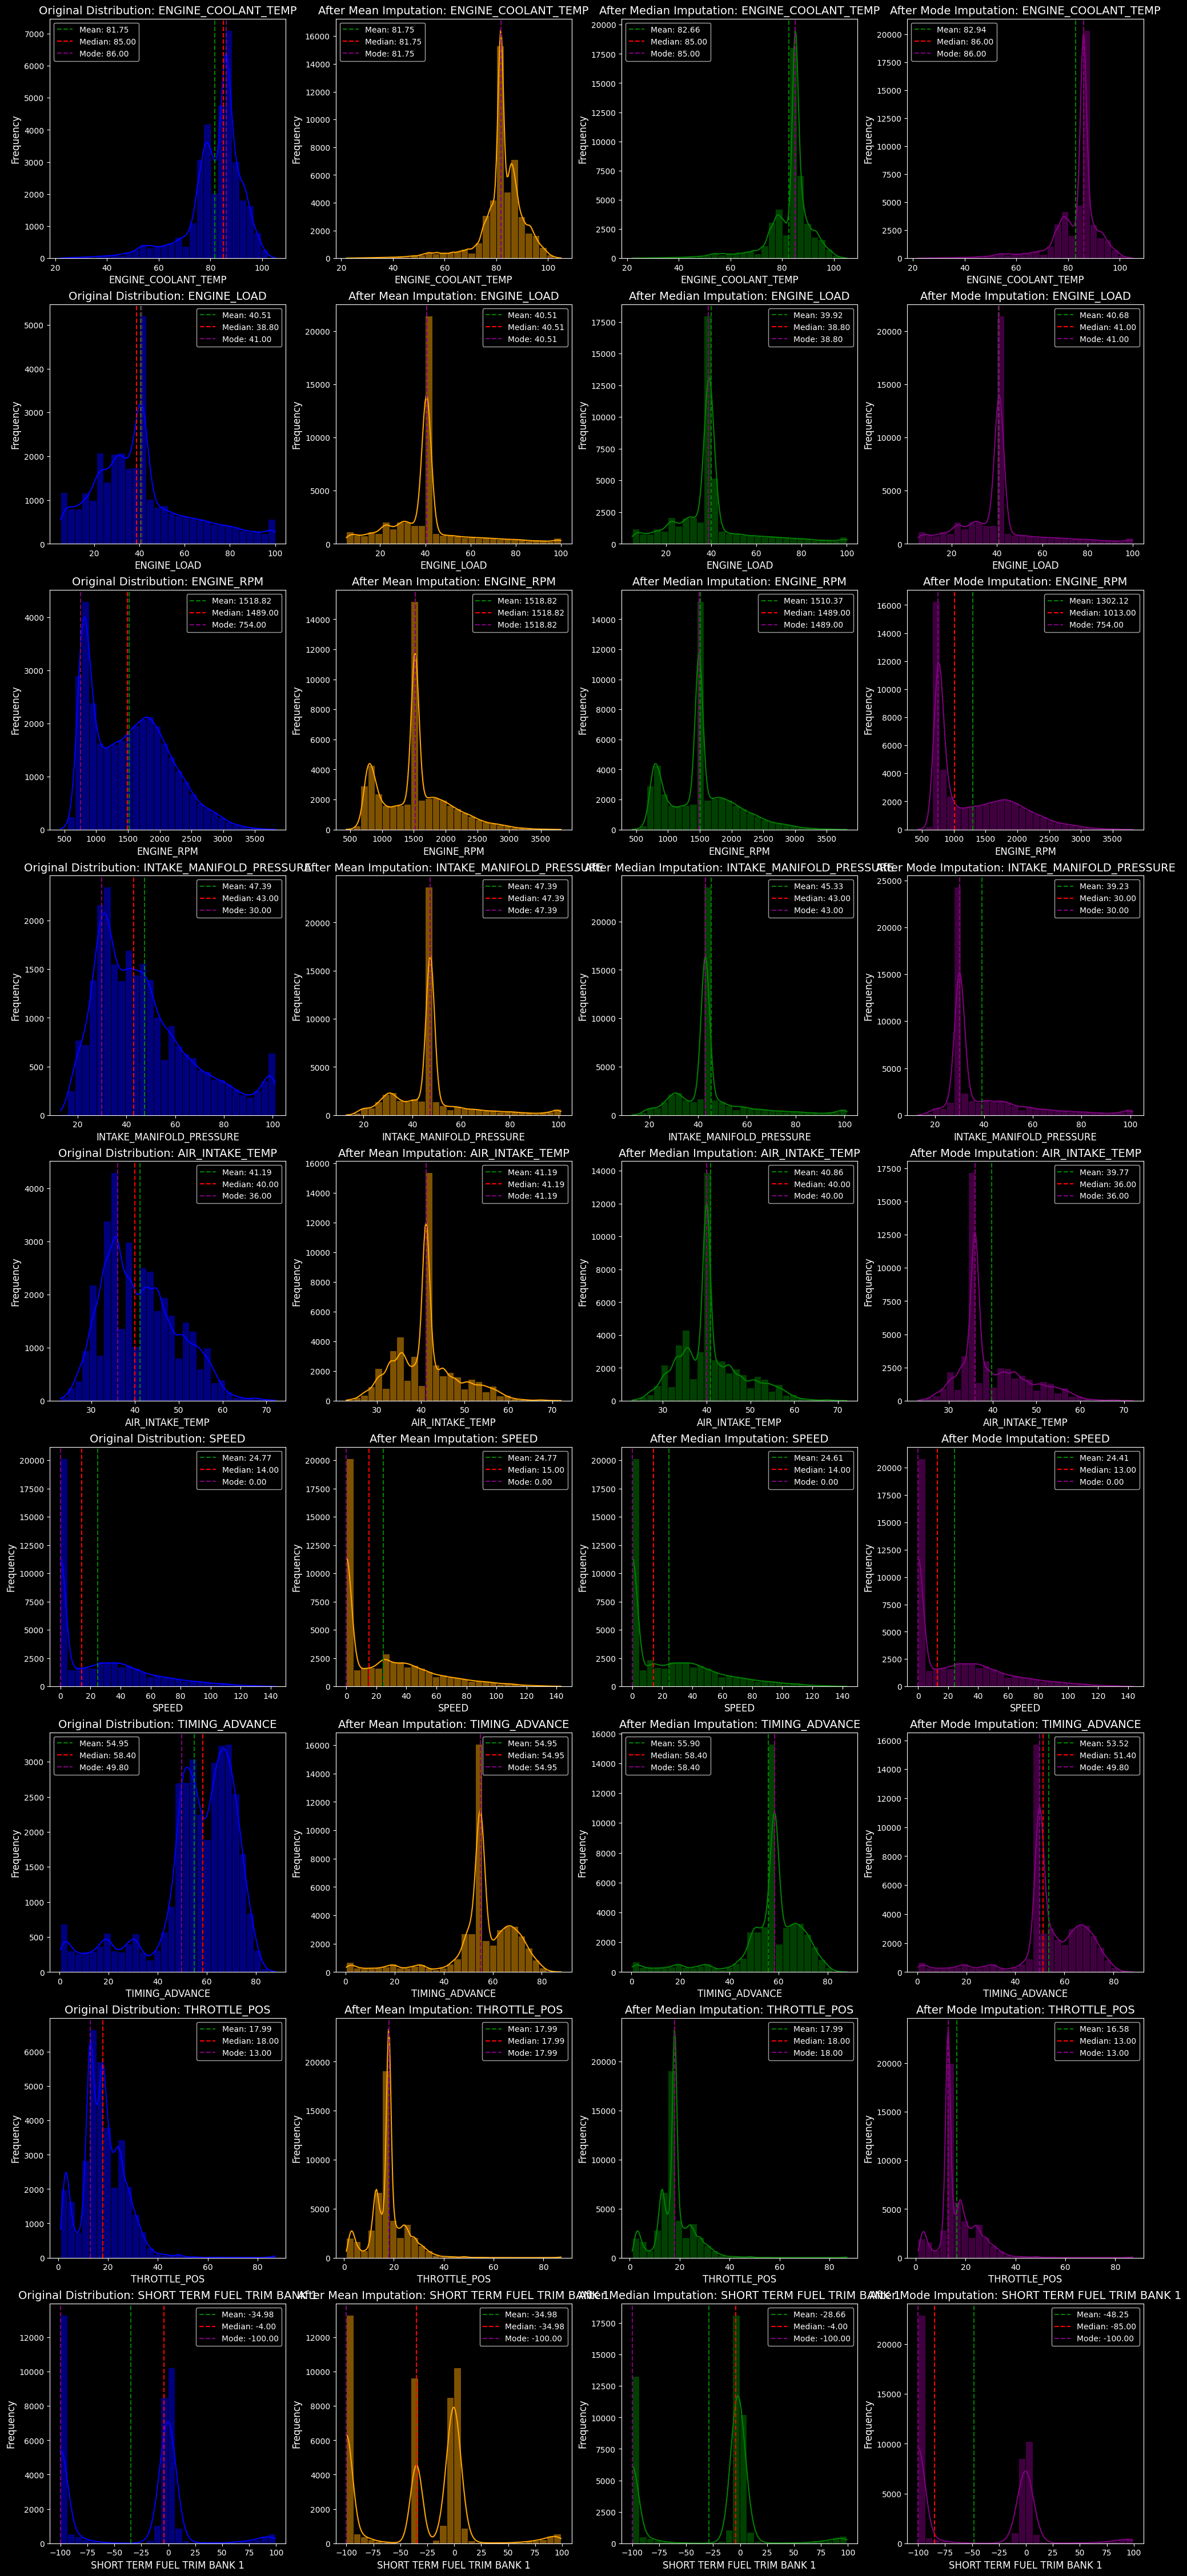

In [48]:
from sklearn.impute import SimpleImputer

def plot_imputation_comparison(df, features):
    fig, axes = plt.subplots(len(features), 4, figsize=(20, 5 * len(features)), constrained_layout=True)

    for i, feature in enumerate(features):
        ax_original, ax_mean, ax_median, ax_mode = axes[i]

        # Original Data Plot
        sns.histplot(df[feature].dropna(), bins=30, kde=True, color='blue', edgecolor='black', ax=ax_original)
        original_mean = df[feature].mean()
        original_median = df[feature].median()
        original_mode = df[feature].mode()

        ax_original.axvline(original_mean, color='green', linestyle='--', label=f'Mean: {original_mean:.2f}')
        ax_original.axvline(original_median, color='red', linestyle='--', label=f'Median: {original_median:.2f}')
        if not original_mode.empty:
            ax_original.axvline(original_mode[0], color='purple', linestyle='--', label=f'Mode: {original_mode[0]:.2f}')

        ax_original.set_title(f'Original Distribution: {feature}', fontsize=14)
        ax_original.set_xlabel(feature, fontsize=12)
        ax_original.set_ylabel('Frequency', fontsize=12)
        ax_original.legend()

        # Mean Imputation
        imputer_mean = SimpleImputer(strategy='mean')
        df_mean_imputed = df.copy()
        df_mean_imputed[feature] = imputer_mean.fit_transform(df[[feature]])

        mean_imputed_value = df_mean_imputed[feature].mean()
        median_imputed_value = df_mean_imputed[feature].median()
        mode_imputed_value = df_mean_imputed[feature].mode()

        sns.histplot(df_mean_imputed[feature], bins=30, kde=True, color='orange', edgecolor='black', ax=ax_mean)
        ax_mean.axvline(mean_imputed_value, color='green', linestyle='--', label=f'Mean: {mean_imputed_value:.2f}')
        ax_mean.axvline(median_imputed_value, color='red', linestyle='--', label=f'Median: {median_imputed_value:.2f}')
        if not mode_imputed_value.empty:
            ax_mean.axvline(mode_imputed_value[0], color='purple', linestyle='--', label=f'Mode: {mode_imputed_value[0]:.2f}')

        ax_mean.set_title(f'After Mean Imputation: {feature}', fontsize=14)
        ax_mean.set_xlabel(feature, fontsize=12)
        ax_mean.set_ylabel('Frequency', fontsize=12)
        ax_mean.legend()

        # Median Imputation
        imputer_median = SimpleImputer(strategy='median')
        df_median_imputed = df.copy()
        df_median_imputed[feature] = imputer_median.fit_transform(df[[feature]])

        mean_imputed_value = df_median_imputed[feature].mean()
        median_imputed_value = df_median_imputed[feature].median()
        mode_imputed_value = df_median_imputed[feature].mode()

        sns.histplot(df_median_imputed[feature], bins=30, kde=True, color='green', edgecolor='black', ax=ax_median)
        ax_median.axvline(mean_imputed_value, color='green', linestyle='--', label=f'Mean: {mean_imputed_value:.2f}')
        ax_median.axvline(median_imputed_value, color='red', linestyle='--', label=f'Median: {median_imputed_value:.2f}')
        if not mode_imputed_value.empty:
            ax_median.axvline(mode_imputed_value[0], color='purple', linestyle='--', label=f'Mode: {mode_imputed_value[0]:.2f}')

        ax_median.set_title(f'After Median Imputation: {feature}', fontsize=14)
        ax_median.set_xlabel(feature, fontsize=12)
        ax_median.set_ylabel('Frequency', fontsize=12)
        ax_median.legend()

        # Mode Imputation
        imputer_mode = SimpleImputer(strategy='most_frequent')
        df_mode_imputed = df.copy()
        df_mode_imputed[feature] = imputer_mode.fit_transform(df[[feature]])

        mean_imputed_value = df_mode_imputed[feature].mean()
        median_imputed_value = df_mode_imputed[feature].median()
        mode_imputed_value = df_mode_imputed[feature].mode()

        sns.histplot(df_mode_imputed[feature], bins=30, kde=True, color='purple', edgecolor='black', ax=ax_mode)
        ax_mode.axvline(mean_imputed_value, color='green', linestyle='--', label=f'Mean: {mean_imputed_value:.2f}')
        ax_mode.axvline(median_imputed_value, color='red', linestyle='--', label=f'Median: {median_imputed_value:.2f}')
        if not mode_imputed_value.empty:
            ax_mode.axvline(mode_imputed_value[0], color='purple', linestyle='--', label=f'Mode: {mode_imputed_value[0]:.2f}')

        ax_mode.set_title(f'After Mode Imputation: {feature}', fontsize=14)
        ax_mode.set_xlabel(feature, fontsize=12)
        ax_mode.set_ylabel('Frequency', fontsize=12)
        ax_mode.legend()

    plt.show()

# Example usage
features_to_impute = [
    'ENGINE_COOLANT_TEMP', 'ENGINE_LOAD', 'ENGINE_RPM', 'INTAKE_MANIFOLD_PRESSURE',
    'AIR_INTAKE_TEMP', 'SPEED', 'TIMING_ADVANCE', 'THROTTLE_POS', 'SHORT TERM FUEL TRIM BANK 1'
]
plot_imputation_comparison(df_dropped, features_to_impute)

**--> Here is the effect of each imputation trail.**

**--> Some of them are done with median or mean beacuse they are similar and the other prefere mode**

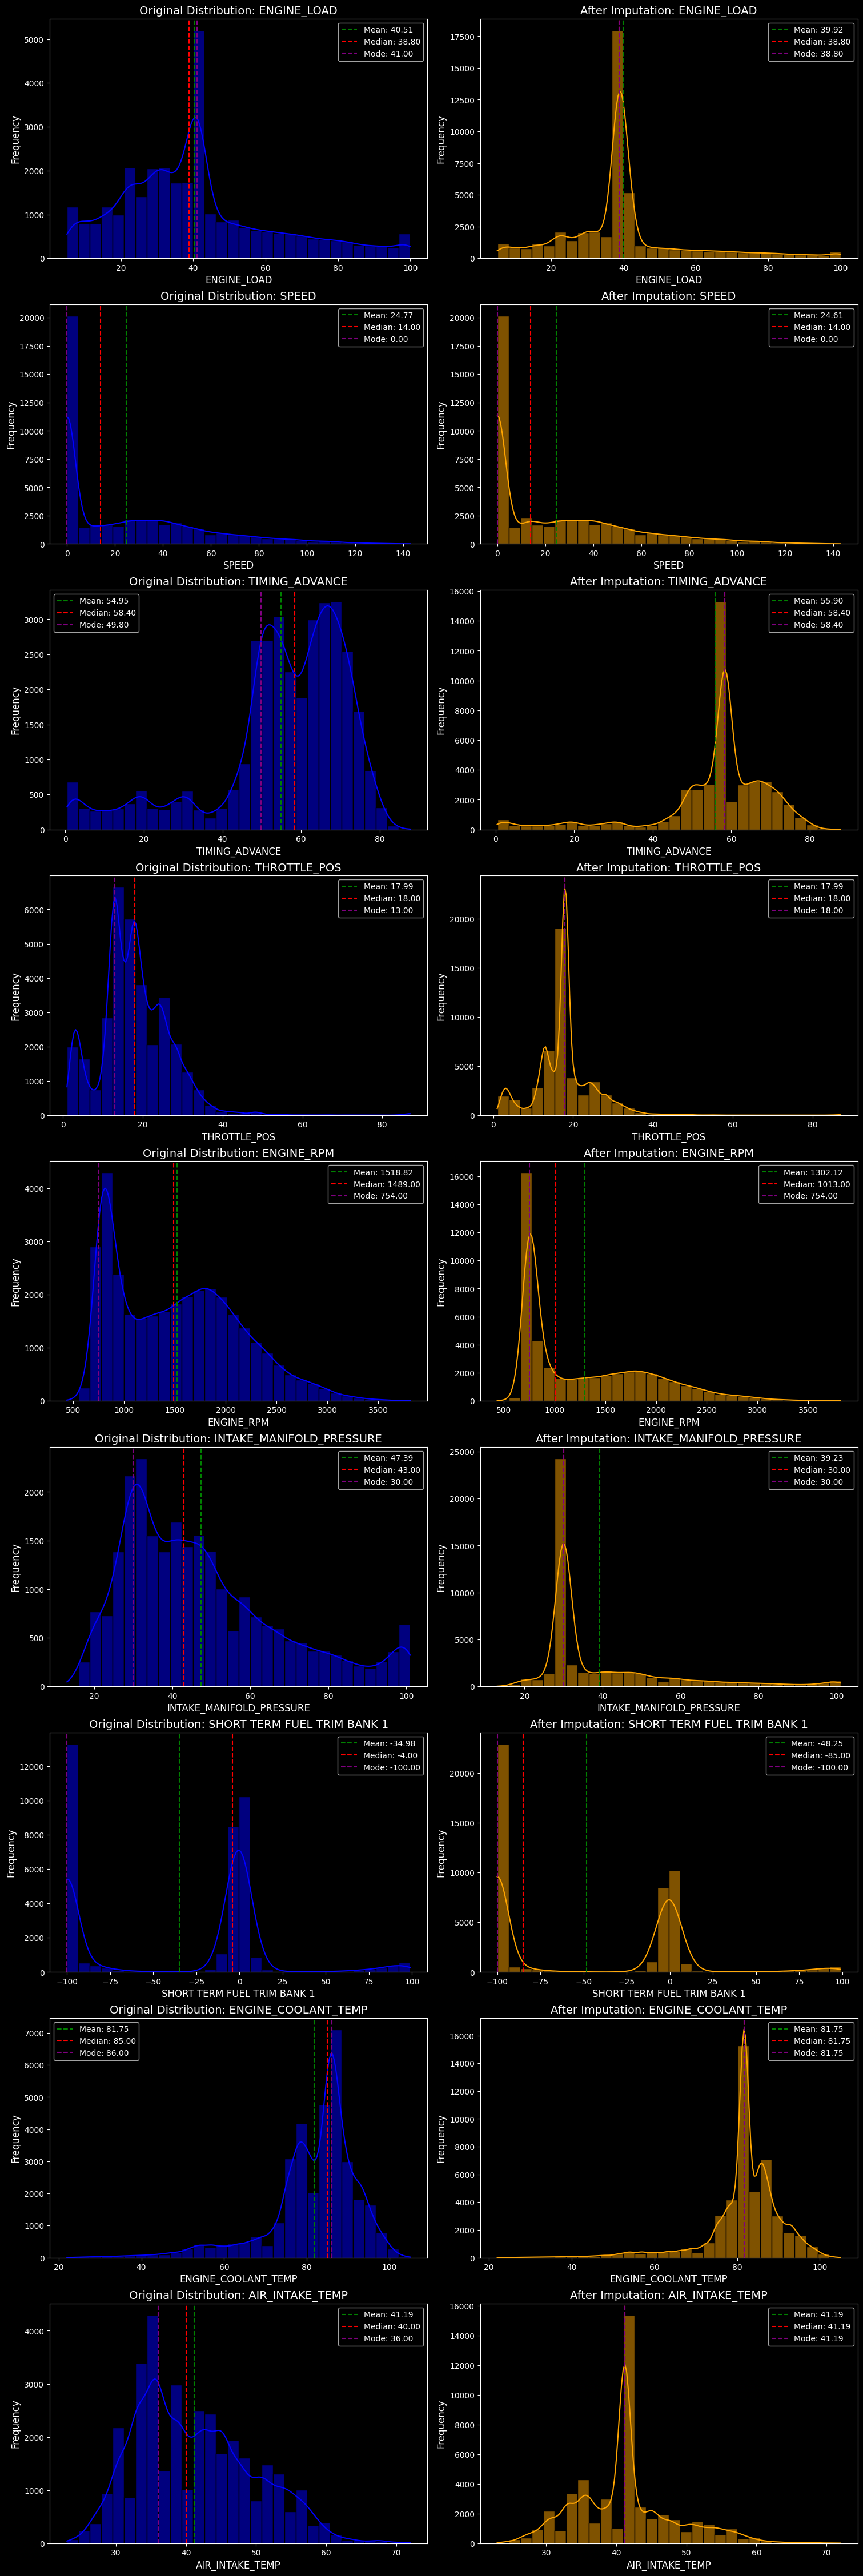

In [49]:

from sklearn.impute import SimpleImputer
def impute_and_plot_comparison(df, median_features, mode_features,mean_features):

    df_imputed2 = df.copy()

    imputer_median = SimpleImputer(strategy='median')
    df_imputed2[median_features] = imputer_median.fit_transform(df[median_features])

    imputer_mean = SimpleImputer(strategy='mean')
    df_imputed2[mean_features] = imputer_mean.fit_transform(df[mean_features])


    imputer_mode = SimpleImputer(strategy='most_frequent')
    df_imputed2[mode_features] = imputer_mode.fit_transform(df[mode_features])


    num_features = len(median_features + mode_features + mean_features)
    fig, axes = plt.subplots(num_features, 2, figsize=(15, 5 * num_features), constrained_layout=True)

    for i, feature in enumerate(median_features + mode_features + mean_features):
        ax_original, ax_imputed = axes[i]

        sns.histplot(df[feature].dropna(), bins=30, kde=True, color='blue', edgecolor='black', ax=ax_original)
        ax_original.set_title(f'Original Distribution: {feature}', fontsize=14)
        ax_original.set_xlabel(feature, fontsize=12)
        ax_original.set_ylabel('Frequency', fontsize=12)


        mean_value = df[feature].mean()
        median_value = df[feature].median()
        mode_value = df[feature].mode()

        ax_original.axvline(mean_value, color='green', linestyle='--', label=f'Mean: {mean_value:.2f}')
        ax_original.axvline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f}')
        if not mode_value.empty:
            ax_original.axvline(mode_value[0], color='purple', linestyle='--', label=f'Mode: {mode_value[0]:.2f}')
        ax_original.legend()


        sns.histplot(df_imputed2[feature], bins=30, kde=True, color='orange', edgecolor='black', ax=ax_imputed)
        ax_imputed.set_title(f'After Imputation: {feature}', fontsize=14)
        ax_imputed.set_xlabel(feature, fontsize=12)
        ax_imputed.set_ylabel('Frequency', fontsize=12)


        mean_value_imputed = df_imputed2[feature].mean()
        median_value_imputed = df_imputed2[feature].median()
        mode_value_imputed = df_imputed2[feature].mode()

        ax_imputed.axvline(mean_value_imputed, color='green', linestyle='--', label=f'Mean: {mean_value_imputed:.2f}')
        ax_imputed.axvline(median_value_imputed, color='red', linestyle='--', label=f'Median: {median_value_imputed:.2f}')
        if not mode_value_imputed.empty:
            ax_imputed.axvline(mode_value_imputed[0], color='purple', linestyle='--', label=f'Mode: {mode_value_imputed[0]:.2f}')
        ax_imputed.legend()

    plt.show()
    return df_imputed2


mean_features= [ 'ENGINE_COOLANT_TEMP', 'AIR_INTAKE_TEMP']

median_features = [
     'ENGINE_LOAD',  'SPEED',
    'TIMING_ADVANCE' ,'THROTTLE_POS']

mode_features = [
    'ENGINE_RPM', 'INTAKE_MANIFOLD_PRESSURE', 'SHORT TERM FUEL TRIM BANK 1'
]


df_imputed2=impute_and_plot_comparison(df_dropped, median_features, mode_features,mean_features)

In [50]:
df_imputed2.shape

(47157, 33)

In [51]:
missing_percentage = df_imputed2.isna().mean() * 100
print("Missing Data Percentage:")
print(missing_percentage)

Missing Data Percentage:
TIMESTAMP                       0.000000
MARK                            0.000000
MODEL                           0.000000
CAR_YEAR                        0.000000
ENGINE_POWER                    0.000000
AUTOMATIC                       0.000000
VEHICLE_ID                      0.000000
BAROMETRIC_PRESSURE(KPA)       78.348920
ENGINE_COOLANT_TEMP             0.000000
FUEL_LEVEL                     93.650996
ENGINE_LOAD                     0.000000
AMBIENT_AIR_TEMP               92.325636
ENGINE_RPM                      0.000000
INTAKE_MANIFOLD_PRESSURE        0.000000
MAF                            74.922069
LONG TERM FUEL TRIM BANK 2     72.284072
FUEL_TYPE                      57.582119
AIR_INTAKE_TEMP                 0.000000
SPEED                           0.000000
SHORT TERM FUEL TRIM BANK 2    72.284072
SHORT TERM FUEL TRIM BANK 1     0.000000
THROTTLE_POS                    0.000000
DTC_NUMBER                      0.000000
TROUBLE_CODES                   

**Group3: Weak features that need aid from strong one those will be handled by untraditional ways like knn Imputation **

# Convert Engine run time features into seconds and put them at Total_Engine_Seconds

In [52]:
df_imputed_extraction=df_imputed2.copy()
df_imputed_extraction['Total_Engine_Seconds'] = (
    (df_imputed_extraction['ER_Hours'] * 3600) +
    (df_imputed_extraction['ER_Minutes'] * 60) +
    df_imputed_extraction['ER_Seconds']
)
df_imputed_extraction = df_imputed_extraction.drop(columns=['ER_Hours', 'ER_Minutes', 'ER_Seconds'])

In [53]:
df_imputed_extraction.isnull().sum()

TIMESTAMP                          0
MARK                               0
MODEL                              0
CAR_YEAR                           0
ENGINE_POWER                       0
AUTOMATIC                          0
VEHICLE_ID                         0
BAROMETRIC_PRESSURE(KPA)       36947
ENGINE_COOLANT_TEMP                0
FUEL_LEVEL                     44163
ENGINE_LOAD                        0
AMBIENT_AIR_TEMP               43538
ENGINE_RPM                         0
INTAKE_MANIFOLD_PRESSURE           0
MAF                            35331
LONG TERM FUEL TRIM BANK 2     34087
FUEL_TYPE                      27154
AIR_INTAKE_TEMP                    0
SPEED                              0
SHORT TERM FUEL TRIM BANK 2    34087
SHORT TERM FUEL TRIM BANK 1        0
THROTTLE_POS                       0
DTC_NUMBER                         0
TROUBLE_CODES                      0
TIMING_ADVANCE                     0
MIN                                0
HOURS                              0
DAYS_OF_WEEK                       0
MONTHS                             0
YEAR                               0
Total_Engine_Seconds           35257
dtype: int64

In [54]:
missing_percentage = df_imputed_extraction.isna().mean() * 100
print("Missing Data Percentage:")
print(missing_percentage)

Missing Data Percentage:
TIMESTAMP                       0.000000
MARK                            0.000000
MODEL                           0.000000
CAR_YEAR                        0.000000
ENGINE_POWER                    0.000000
AUTOMATIC                       0.000000
VEHICLE_ID                      0.000000
BAROMETRIC_PRESSURE(KPA)       78.348920
ENGINE_COOLANT_TEMP             0.000000
FUEL_LEVEL                     93.650996
ENGINE_LOAD                     0.000000
AMBIENT_AIR_TEMP               92.325636
ENGINE_RPM                      0.000000
INTAKE_MANIFOLD_PRESSURE        0.000000
MAF                            74.922069
LONG TERM FUEL TRIM BANK 2     72.284072
FUEL_TYPE                      57.582119
AIR_INTAKE_TEMP                 0.000000
SPEED                           0.000000
SHORT TERM FUEL TRIM BANK 2    72.284072
SHORT TERM FUEL TRIM BANK 1     0.000000
THROTTLE_POS                    0.000000
DTC_NUMBER                      0.000000
TROUBLE_CODES                   

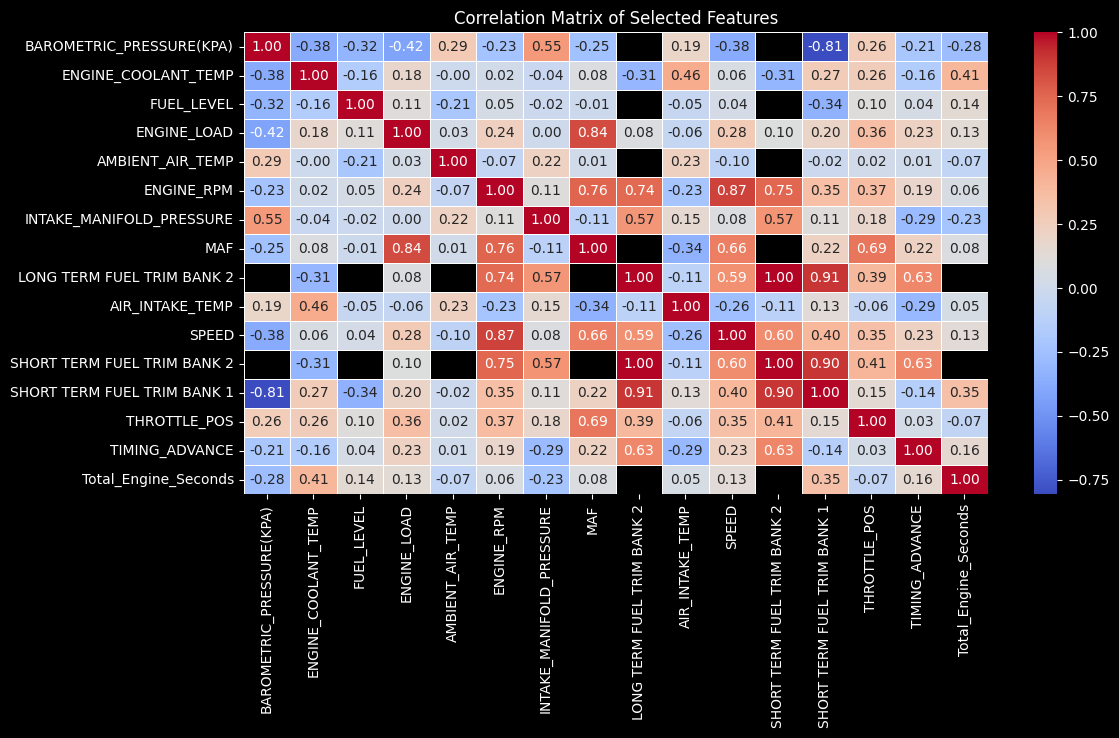

In [55]:
columns_to_check = [
    'BAROMETRIC_PRESSURE(KPA)', 'ENGINE_COOLANT_TEMP', 'FUEL_LEVEL', 'ENGINE_LOAD',
    'AMBIENT_AIR_TEMP', 'ENGINE_RPM', 'INTAKE_MANIFOLD_PRESSURE', 'MAF',
    'LONG TERM FUEL TRIM BANK 2', 'AIR_INTAKE_TEMP',
    'SPEED', 'SHORT TERM FUEL TRIM BANK 2', 'SHORT TERM FUEL TRIM BANK 1',
    'THROTTLE_POS', 'TIMING_ADVANCE', 'Total_Engine_Seconds',

]
correlation_matrix = df_imputed_extraction[columns_to_check].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [56]:
numerical_features = df_imputed_extraction.select_dtypes(include=[float, int]).columns
numerical_features

Index(['TIMESTAMP', 'CAR_YEAR', 'ENGINE_POWER', 'BAROMETRIC_PRESSURE(KPA)',
       'ENGINE_COOLANT_TEMP', 'FUEL_LEVEL', 'ENGINE_LOAD', 'AMBIENT_AIR_TEMP',
       'ENGINE_RPM', 'INTAKE_MANIFOLD_PRESSURE', 'MAF',
       'LONG TERM FUEL TRIM BANK 2', 'AIR_INTAKE_TEMP', 'SPEED',
       'SHORT TERM FUEL TRIM BANK 2', 'SHORT TERM FUEL TRIM BANK 1',
       'THROTTLE_POS', 'DTC_NUMBER', 'TROUBLE_CODES', 'TIMING_ADVANCE', 'MIN',
       'HOURS', 'DAYS_OF_WEEK', 'MONTHS', 'YEAR', 'Total_Engine_Seconds'],
      dtype='object')

# Show the weak features over the strongest features

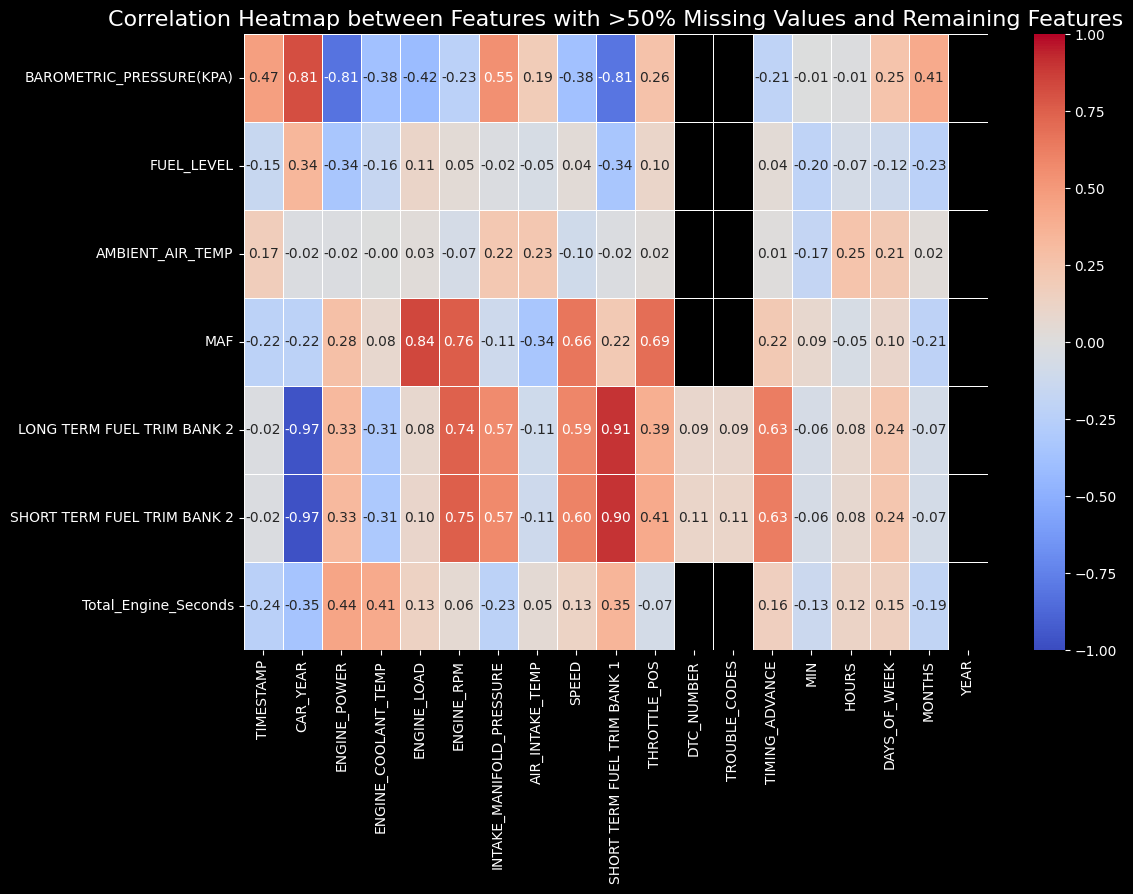

In [57]:
df = df_imputed_extraction.copy()

# Select numerical features
numerical_features = df.select_dtypes(include=[float, int]).columns

# Calculate the correlation matrix
corr_matrix = df[numerical_features].corr()

# Define the missing value threshold
missing_threshold = 0.5

# Identify numerical features with more than 50% missing values
missing_percentage = df[numerical_features].isnull().mean()
features_with_missing = missing_percentage[missing_percentage > missing_threshold].index

# Identify features without more than 50% missing values
features_without_missing = missing_percentage[missing_percentage <= missing_threshold].index

# Create a correlation matrix including only features with more than 50% missing values and the rest
plot_corr_matrix = corr_matrix.loc[features_with_missing, features_without_missing]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(plot_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap between Features with >50% Missing Values and Remaining Features', fontsize=16)
plt.show()

**-->Using linear regression imputation for high correlated features**

**-->4 features realted with Short tirm bank 1**

In [58]:
from sklearn.linear_model import LinearRegression
def impute_with_strong_feature(df, strong_feature, weak_features):
    df_impute = df.copy()

    for weak_feature in weak_features:

        known_data = df_impute.dropna(subset=[strong_feature])


        known_data = known_data.dropna(subset=[weak_feature])


        if known_data.empty:
            print(f"Not enough data for imputation of {weak_feature} using {strong_feature}")
            continue
        X = known_data[[strong_feature]].values.reshape(-1, 1)
        y = known_data[weak_feature].values
        model = LinearRegression()
        model.fit(X, y)


        missing_indices = df_impute[weak_feature].isna()
        df_impute.loc[missing_indices, weak_feature] = model.predict(df_impute.loc[missing_indices, [strong_feature]])

    return df_impute

feature_groups = {
    'SHORT TERM FUEL TRIM BANK 1': [ 'FUEL_LEVEL', 'SHORT TERM FUEL TRIM BANK 2', 'LONG TERM FUEL TRIM BANK 2']
}


for strong_feature, weak_features in feature_groups.items():
    df = impute_with_strong_feature(df, strong_feature, weak_features)



**-->Features related with Engine power**

In [59]:
feature_groups = {
    'ENGINE_POWER': ['Total_Engine_Seconds','BAROMETRIC_PRESSURE(KPA)']
}


for strong_feature, weak_features in feature_groups.items():
    df = impute_with_strong_feature(df, strong_feature, weak_features)

**-->Features related with Engine load**

In [60]:
feature_groups = {
    'ENGINE_LOAD': ['MAF']
}


for strong_feature, weak_features in feature_groups.items():
    df = impute_with_strong_feature(df, strong_feature, weak_features)

**-->Features related with Hours**

In [61]:
feature_groups = {
    'HOURS': ['AMBIENT_AIR_TEMP']
}


for strong_feature, weak_features in feature_groups.items():
    df = impute_with_strong_feature(df, strong_feature, weak_features)

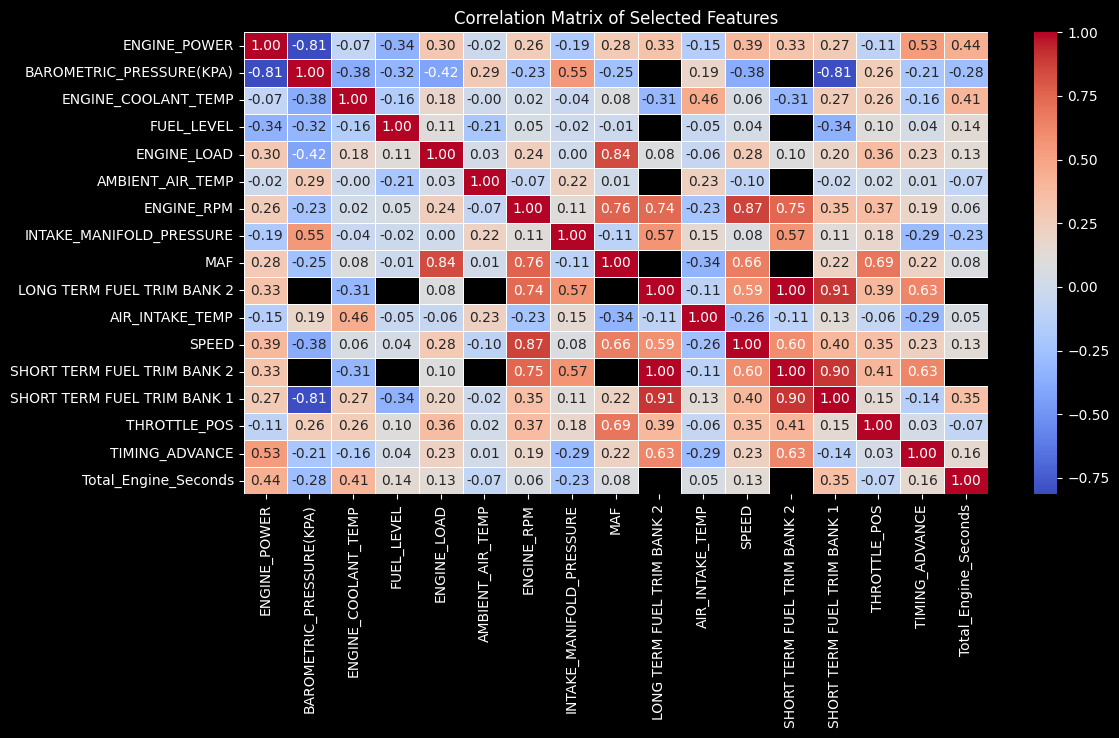

In [62]:
columns_to_check = [
    'ENGINE_POWER','BAROMETRIC_PRESSURE(KPA)', 'ENGINE_COOLANT_TEMP', 'FUEL_LEVEL', 'ENGINE_LOAD',
    'AMBIENT_AIR_TEMP', 'ENGINE_RPM', 'INTAKE_MANIFOLD_PRESSURE', 'MAF',
    'LONG TERM FUEL TRIM BANK 2', 'AIR_INTAKE_TEMP',
    'SPEED', 'SHORT TERM FUEL TRIM BANK 2', 'SHORT TERM FUEL TRIM BANK 1',
    'THROTTLE_POS', 'TIMING_ADVANCE', 'Total_Engine_Seconds',

]
correlation_matrix = df_imputed_extraction[columns_to_check].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [63]:
df.isnull().sum()

TIMESTAMP                          0
MARK                               0
MODEL                              0
CAR_YEAR                           0
ENGINE_POWER                       0
AUTOMATIC                          0
VEHICLE_ID                         0
BAROMETRIC_PRESSURE(KPA)           0
ENGINE_COOLANT_TEMP                0
FUEL_LEVEL                         0
ENGINE_LOAD                        0
AMBIENT_AIR_TEMP                   0
ENGINE_RPM                         0
INTAKE_MANIFOLD_PRESSURE           0
MAF                                0
LONG TERM FUEL TRIM BANK 2         0
FUEL_TYPE                      27154
AIR_INTAKE_TEMP                    0
SPEED                              0
SHORT TERM FUEL TRIM BANK 2        0
SHORT TERM FUEL TRIM BANK 1        0
THROTTLE_POS                       0
DTC_NUMBER                         0
TROUBLE_CODES                      0
TIMING_ADVANCE                     0
MIN                                0
HOURS                              0
DAYS_OF_WEEK                       0
MONTHS                             0
YEAR                               0
Total_Engine_Seconds               0
dtype: int64

#Impute fuel_type using mode

In [64]:
df['FUEL_TYPE'] = df['FUEL_TYPE'].fillna(df['FUEL_TYPE'].mode()[0])

In [65]:
df['FUEL_TYPE'].unique()

array(['Biodiesel_Ethanol', 'Biodiesel_Gasoline'], dtype=object)

In [66]:
# convert Fuel type categories to numeric
df['FUEL_TYPE'] = df['FUEL_TYPE'].replace({'Biodiesel_Ethanol': 0, 'Biodiesel_Gasoline': 1})

In [67]:
def count_duplicates(df):
    duplicate_counts = {}
    for column in df.columns:

        count = df[column].duplicated().sum()
        duplicate_counts[column] = count
    return duplicate_counts

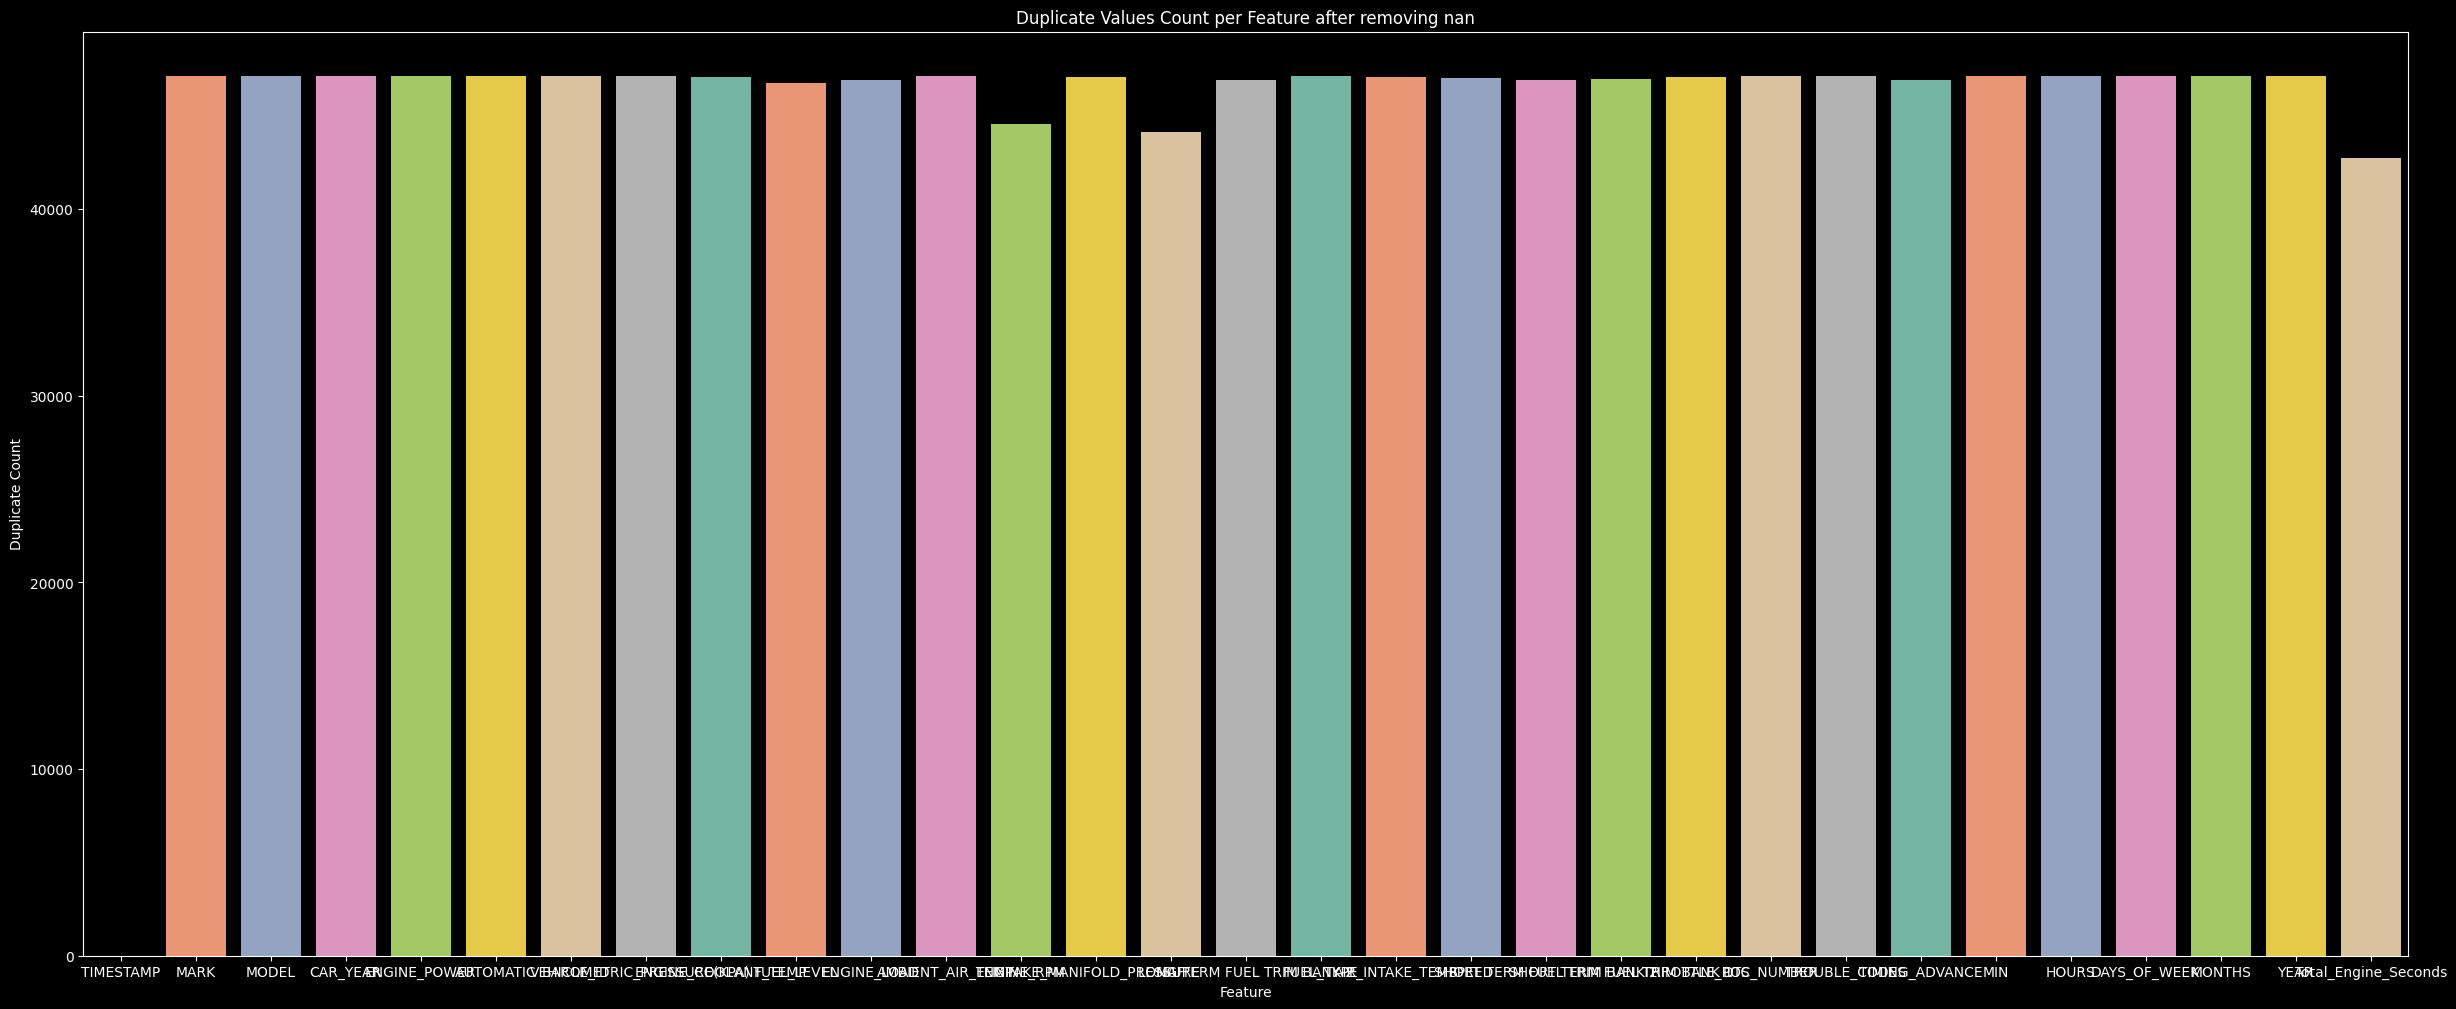

In [68]:
duplicates = count_duplicates(df)
duplicates_df = pd.DataFrame(list(duplicates.items()), columns=['Feature', 'Duplicate Count'])
plt.figure(figsize=(30, 12))
sns.barplot(x='Feature', y='Duplicate Count', data=duplicates_df, palette='Set2')
plt.title('Duplicate Values Count per Feature after removing nan')
plt.xlabel('Feature')
plt.ylabel('Duplicate Count')
plt.show()

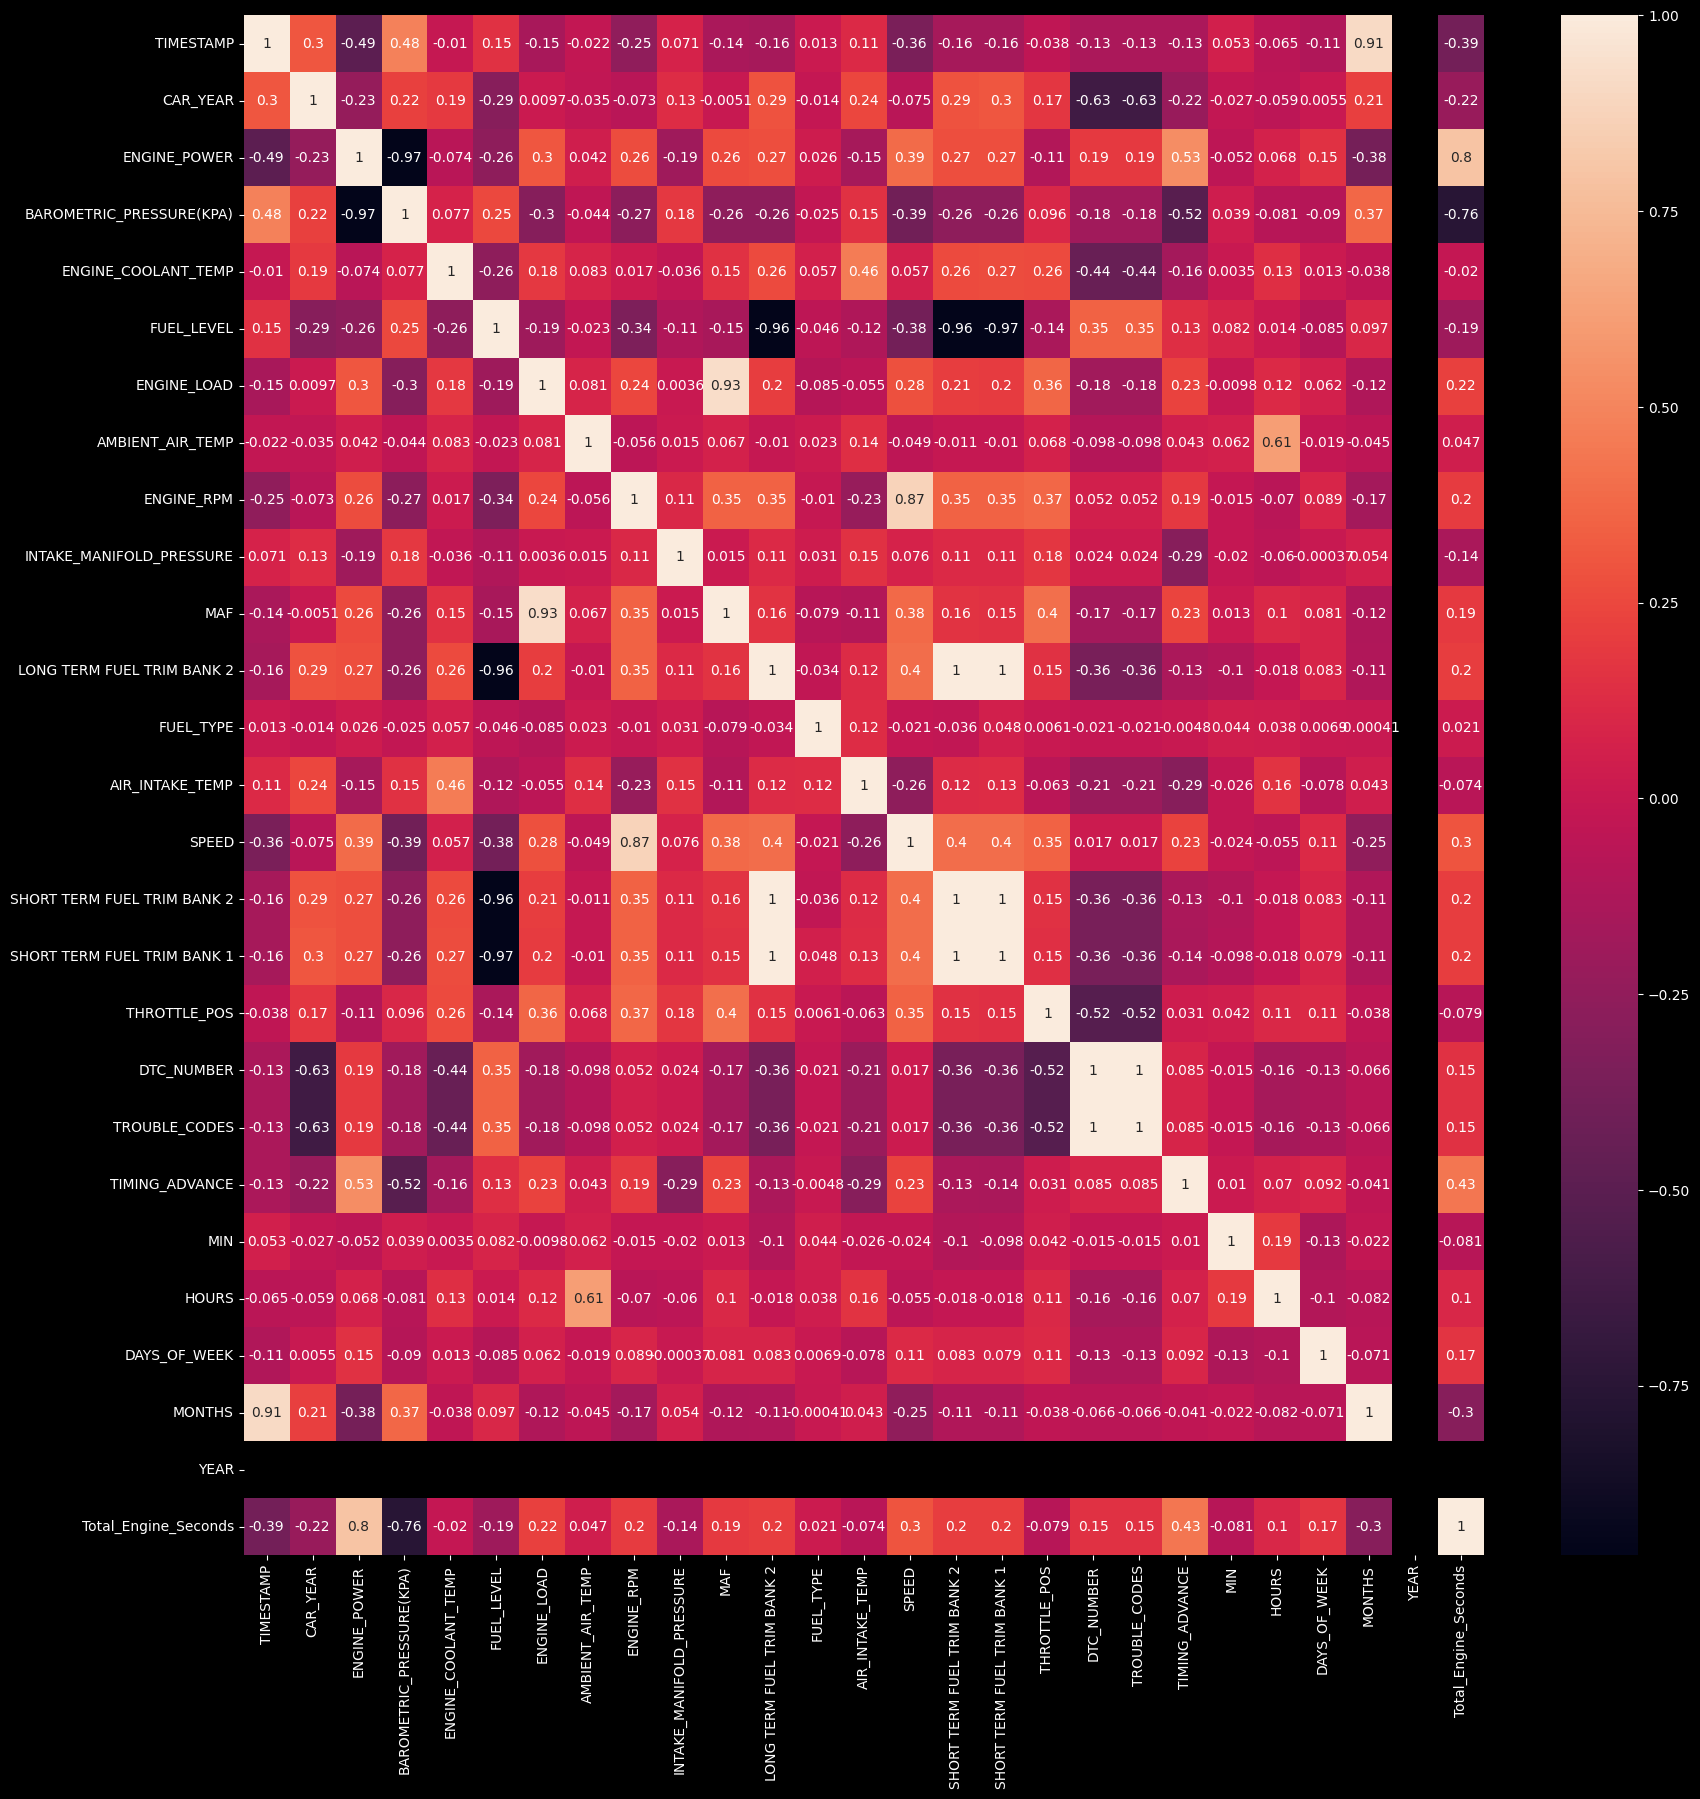

In [69]:
plt.figure(figsize=(20, 20))
cor = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns,annot=True )
plt.show()

In [70]:
outliers_list = df.select_dtypes(include=['number']).columns
len(outliers_list)

27

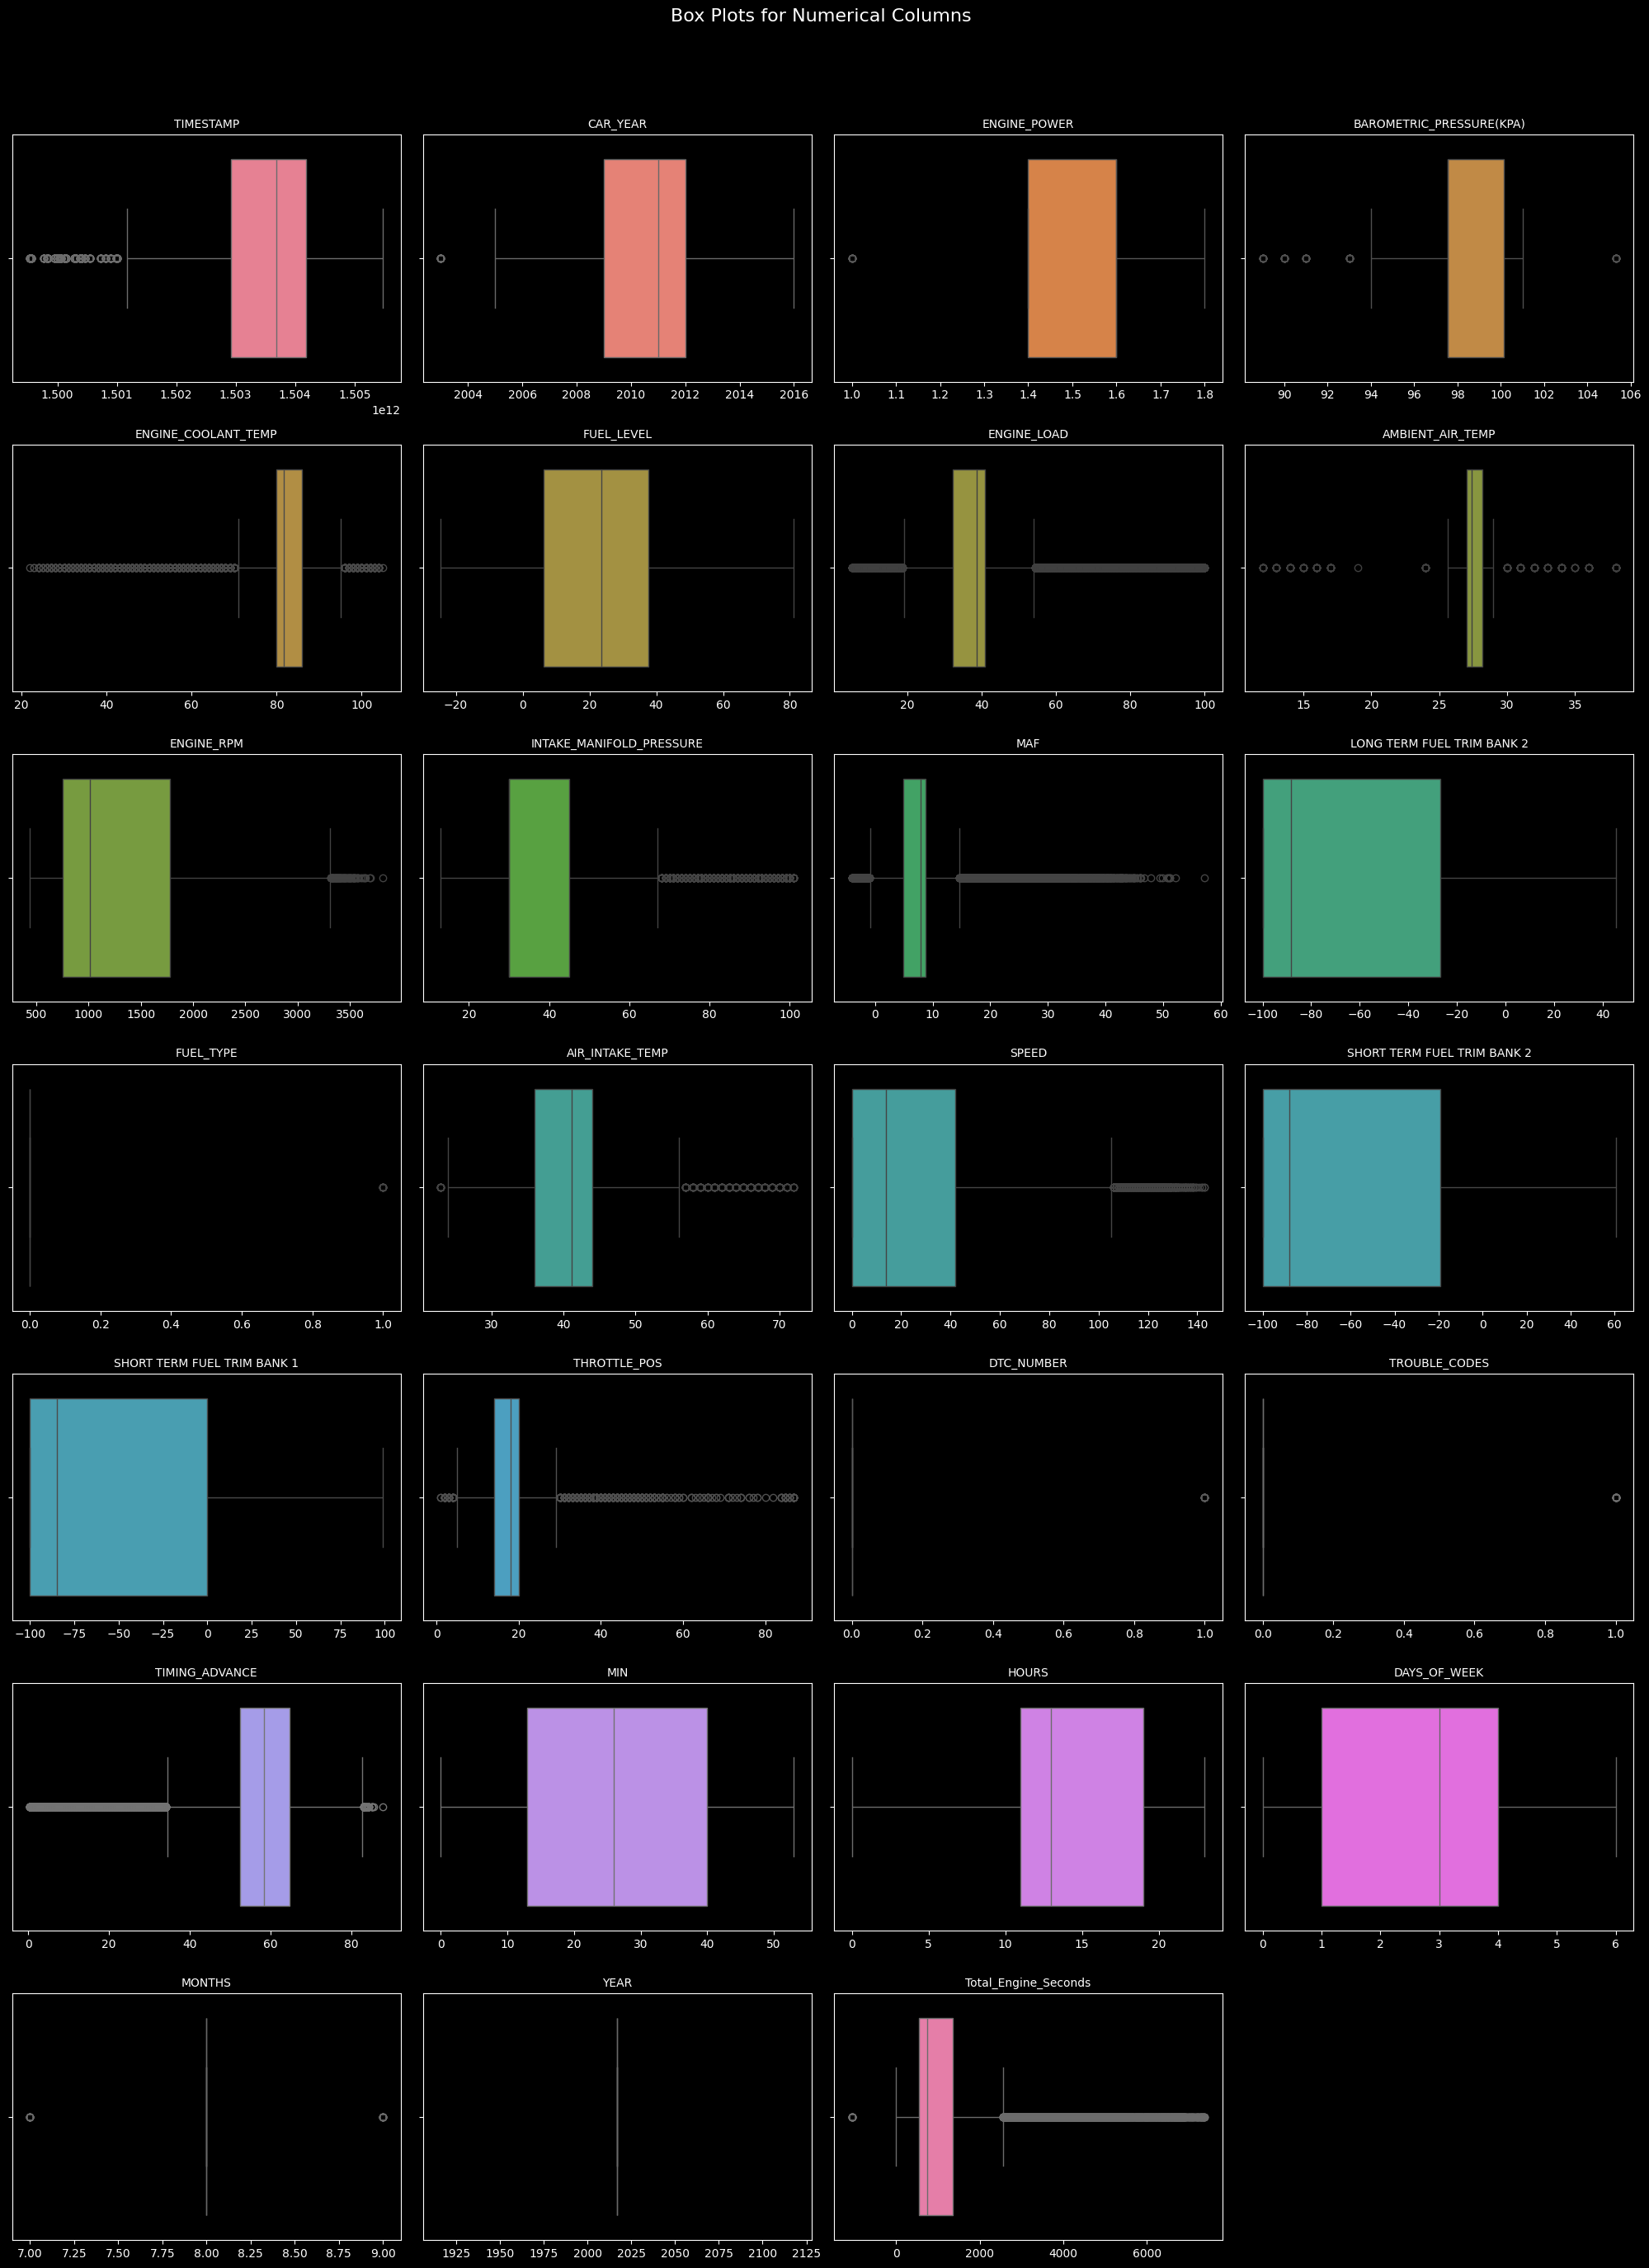

In [71]:
def draw_box_plot(data,outliers_list):
    n_cols = 4
    n_rows = (len(outliers_list) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4 * n_rows))
    fig.suptitle('Box Plots for Numerical Columns', fontsize=16)
    axes = axes.flatten()
    colors = sns.color_palette("husl", len(outliers_list))

    for ax, column, color in zip(axes, outliers_list, colors):
        sns.boxplot(x=data[column], ax=ax, color=color)
        ax.set_title(column, fontsize=10)
        ax.set_xlabel('')
    for i in range(len(outliers_list), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

draw_box_plot(df,outliers_list)

In [72]:
def remove_outlierss(task2_data2, column):
    Q1 = task2_data2[column].quantile(0.25)
    Q3 = task2_data2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return task2_data2[(task2_data2[column] >= lower_bound) & (task2_data2[column] <= upper_bound)]
def count_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = data[(data[column] < lower_bound) | (data[column] > upper_bound)].shape[0]
    return outliers_count

def count_all_outliers(data):
    outliers_counts = {}
    numerical_columns = data.select_dtypes(include='number').columns
    for col in numerical_columns:
        outliers_counts[col] = count_outliers(data, col)
    return outliers_counts
outliers_counts = count_all_outliers(df)
print("Number of outliers for each numerical column:")
print(outliers_counts)

Number of outliers for each numerical column:
{'TIMESTAMP': 8203, 'CAR_YEAR': 507, 'ENGINE_POWER': 5580, 'BAROMETRIC_PRESSURE(KPA)': 6661, 'ENGINE_COOLANT_TEMP': 5407, 'FUEL_LEVEL': 0, 'ENGINE_LOAD': 10819, 'AMBIENT_AIR_TEMP': 1269, 'ENGINE_RPM': 83, 'INTAKE_MANIFOLD_PRESSURE': 4083, 'MAF': 8305, 'LONG TERM FUEL TRIM BANK 2': 0, 'FUEL_TYPE': 138, 'AIR_INTAKE_TEMP': 1665, 'SPEED': 744, 'SHORT TERM FUEL TRIM BANK 2': 0, 'SHORT TERM FUEL TRIM BANK 1': 0, 'THROTTLE_POS': 5684, 'DTC_NUMBER': 6077, 'TROUBLE_CODES': 6077, 'TIMING_ADVANCE': 4543, 'MIN': 0, 'HOURS': 0, 'DAYS_OF_WEEK': 0, 'MONTHS': 21754, 'YEAR': 0, 'Total_Engine_Seconds': 8325}


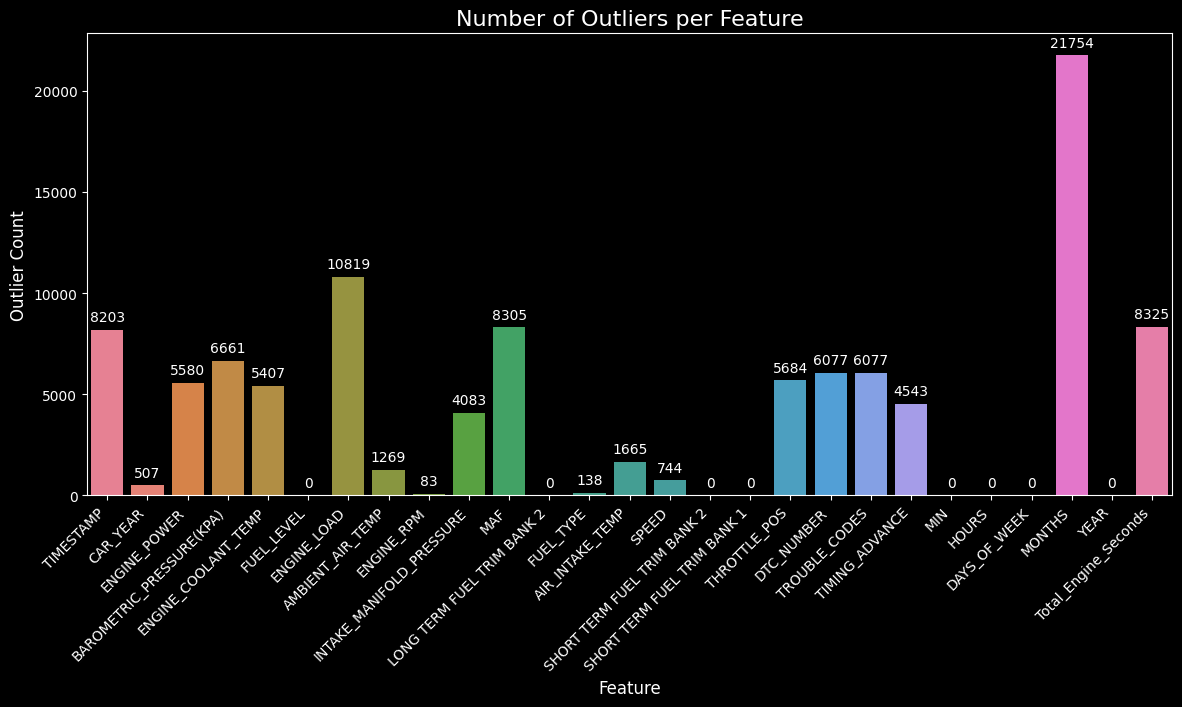

In [73]:
if outliers_counts:
    outliers_df = pd.DataFrame(list(outliers_counts.items()), columns=['Feature', 'Outlier Count'])
    plt.figure(figsize=(14, 6))
    palette = sns.color_palette("husl", len(outliers_df))
    bar_plot = sns.barplot(x='Feature', y='Outlier Count', data=outliers_df, palette=palette)
    plt.title('Number of Outliers per Feature', fontsize=16)
    plt.xlabel('Feature', fontsize=12)
    plt.ylabel('Outlier Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    for p in bar_plot.patches:
        bar_plot.annotate(format(p.get_height(), '.0f'),
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center',
                          xytext=(0, 9),
                          textcoords='offset points')
    plt.show()
else:
    print("No outliers found or the DataFrame is empty.")

# Double check on the imputation that we already done

In [74]:
def remove_rows_with_unusual_conditions(df, conditions_dict):
    combined_mask = pd.Series([True] * len(df), index=df.index)
    for feature_name, condition_func in conditions_dict.items():
        if feature_name in df.columns:
            feature_mask = df[feature_name].apply(condition_func)
            combined_mask &= ~feature_mask

    cleaned_df = df[combined_mask]

    return cleaned_df
def Engine_Load(value):
    return value < 0 or value > 100.

def	Engine_coolant_temperature(value):
    return value < -40. or value > 215.

def STFT_Bank(value): # for short tank 1,2 long tank 2
    return value < -100 or value > 99.2

def  Fuel_Pressure(value):
    return value < 0 or value > 765.

def Intake_manifold_absolute_pressure(value):
    return value < 0 or value > 255.

def Engine_speed(value):
    return value < 0 or value > 16383.75

def Vehicle_speed(value):
    return value<0 or value>255

def Intake_air_temperature(value):
    return value < -40. or value > 215.

def MAF(value):
    return value<0 or value> 655.35

def Throttle_position(value):
    return value<0 or value> 100.

def Fuel_Level(value):
    return value<0 or value> 100.

def Equtive_Ratio(value):
    return value<0 or value> 2.

def Ampiant_air_temperature(value):
    return value < -40. or value > 215.
def totalsec(value):
    return value<0

conditions_dict = {
        'SPEED': Vehicle_speed,
        'ENGINE_COOLANT_TEMP':Engine_coolant_temperature,
        'FUEL_LEVEL':Fuel_Level,
        'ENGINE_LOAD':Engine_Load,
        'AMBIENT_AIR_TEMP':Ampiant_air_temperature,
        'ENGINE_RPM':Engine_speed,
        'INTAKE_MANIFOLD_PRESSURE':Intake_manifold_absolute_pressure,
        'MAF':MAF,
        'LONG TERM FUEL TRIM BANK 2':STFT_Bank,
        'AIR_INTAKE_TEMP':Intake_air_temperature,
        'FUEL_PRESSURE':Fuel_Pressure,
        'SHORT TERM FUEL TRIM BANK 2':STFT_Bank,
        'SHORT TERM FUEL TRIM BANK 1':STFT_Bank,
        'THROTTLE_POS':Throttle_position,
        'EQUIV_RATIO':Equtive_Ratio,
        'Total_Engine_Seconds':totalsec
    }

safe_df = remove_rows_with_unusual_conditions(df, conditions_dict)


In [75]:
df.shape

(47157, 31)

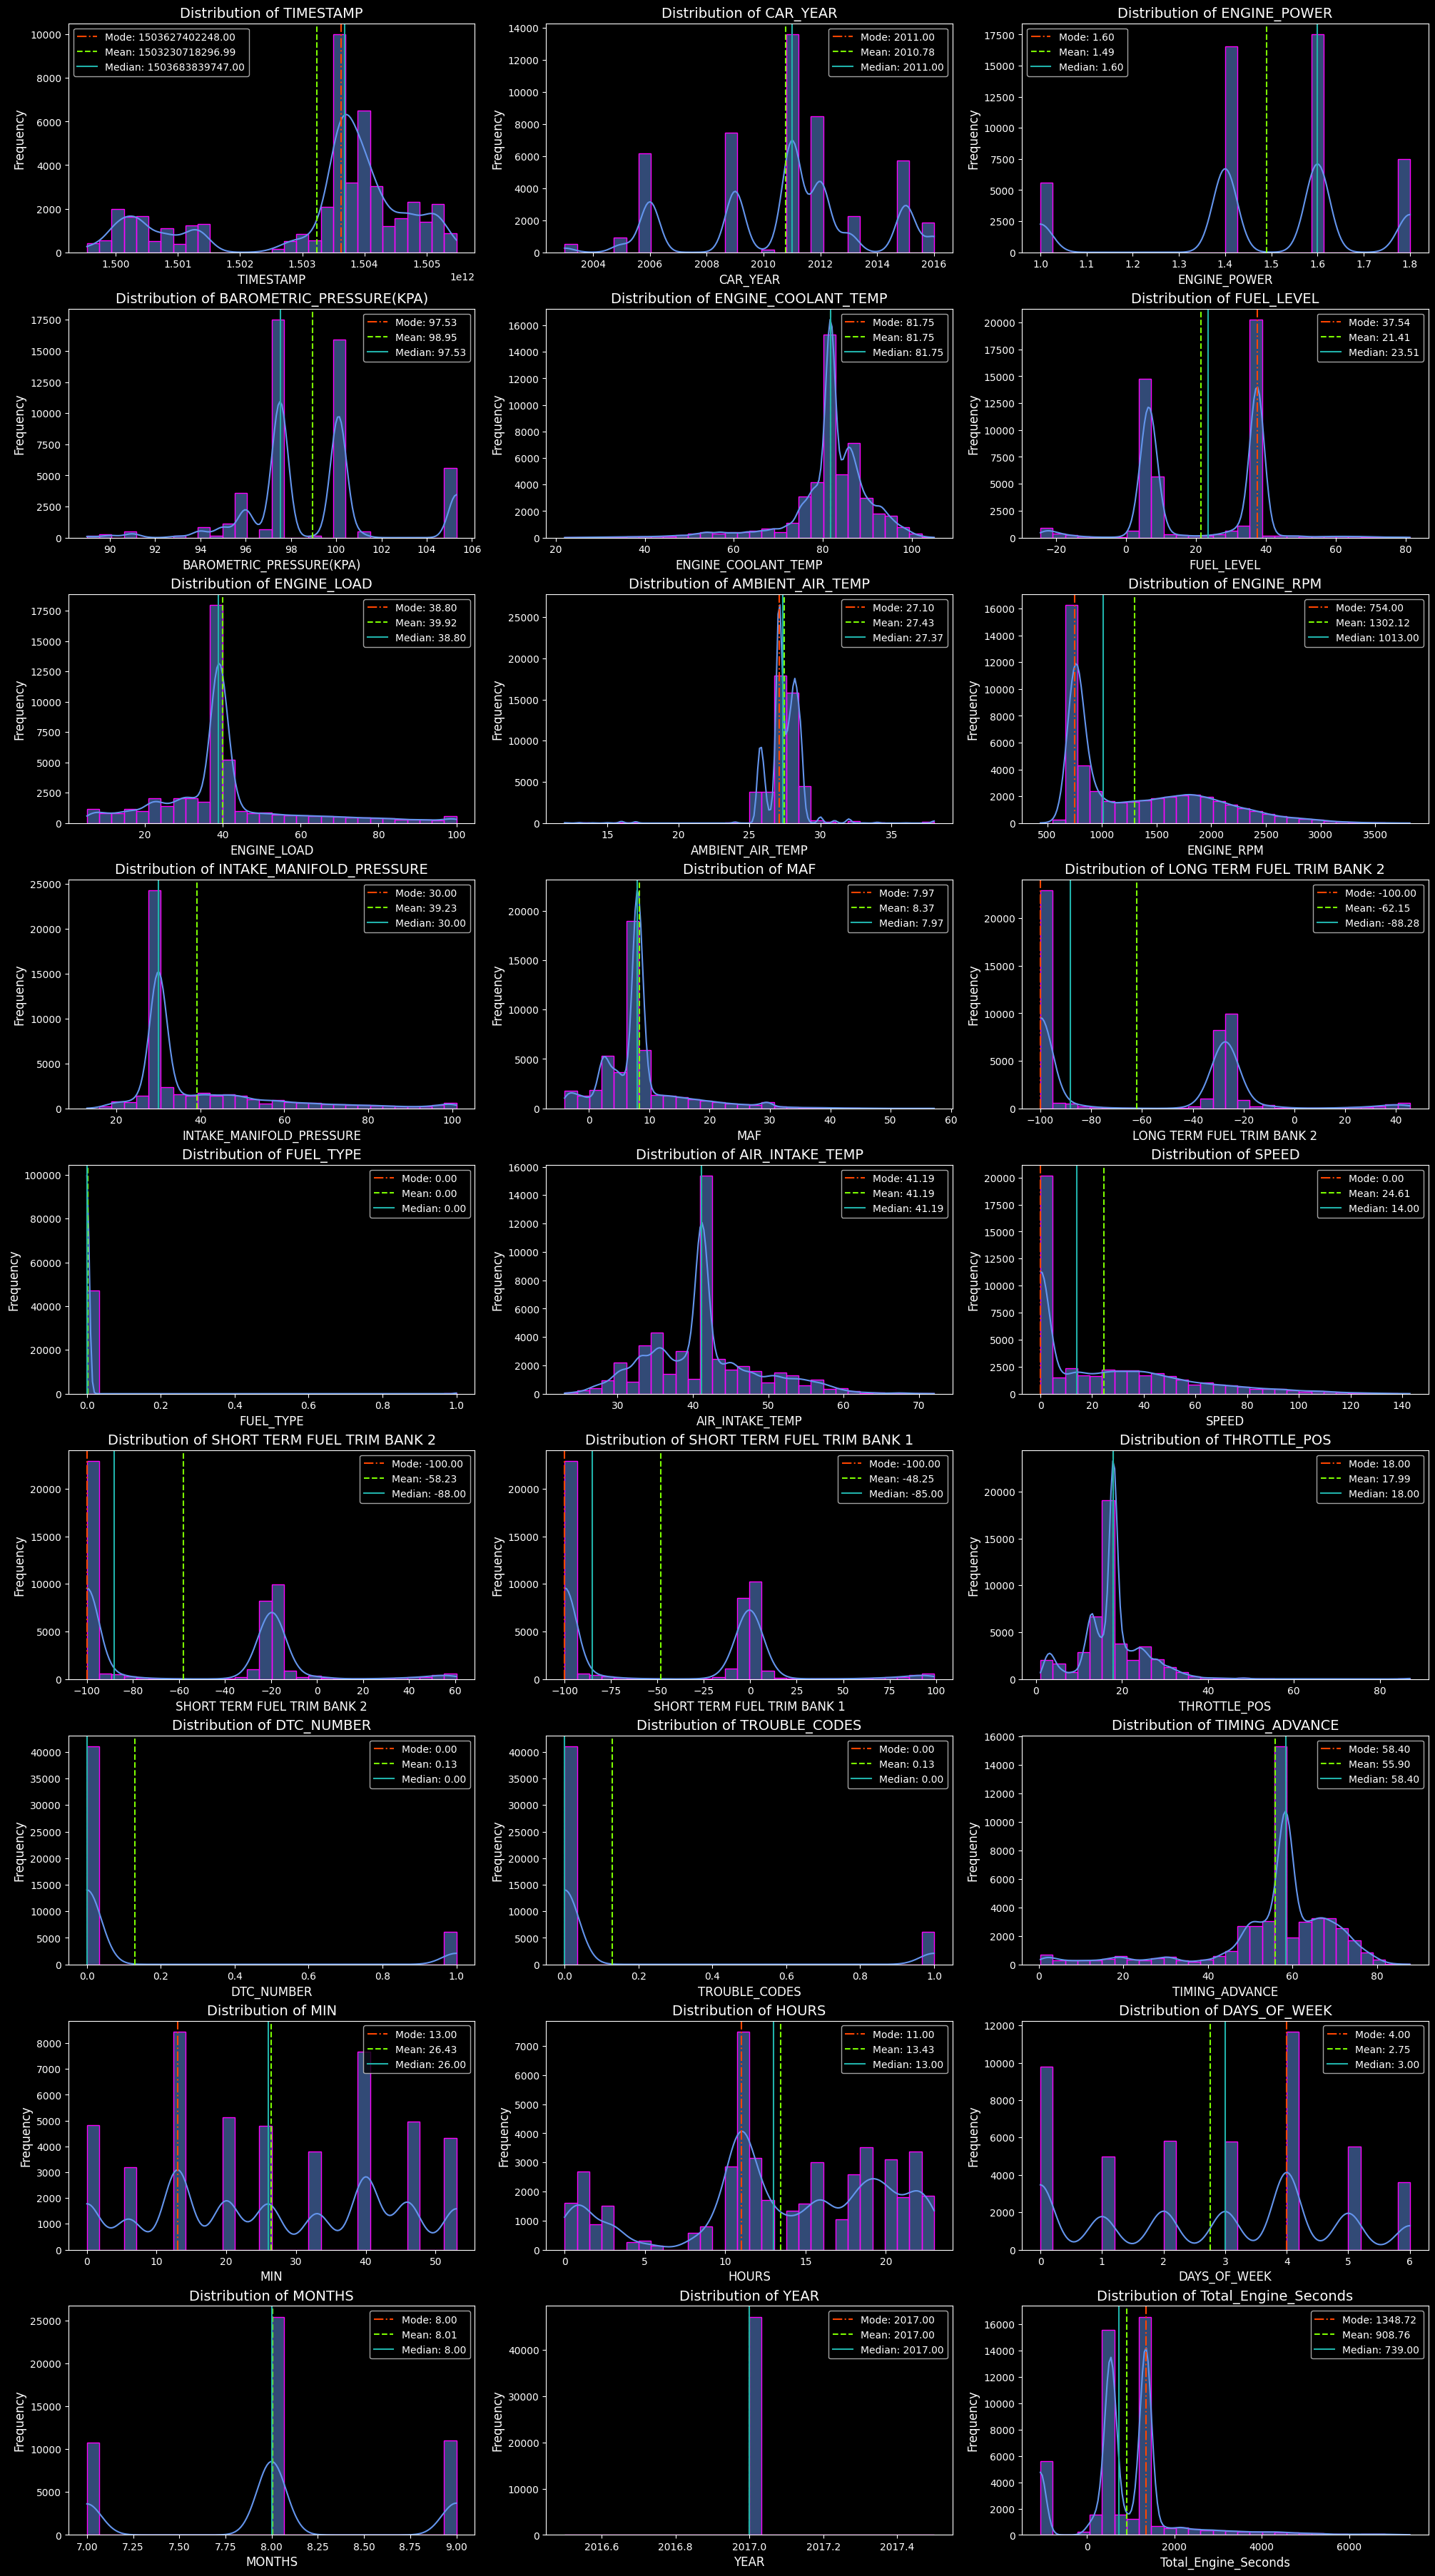

In [76]:
outliers_list = df.select_dtypes(include=['number']).columns.tolist()
n_features = len(outliers_list)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()
for i, feature in enumerate(outliers_list):
    ax = axes[i]
    sns.histplot(df[feature], bins=30, kde=True, color='#6495ed', edgecolor='#ff00ff', ax=ax)

    mean_value = df[feature].mean()
    median_value = df[feature].median()
    mode_series = df[feature].mode()

    if not mode_series.empty:
        mode_value = mode_series[0]
        ax.axvline(mode_value, color='#ff4500', linestyle='-.', label=f'Mode: {mode_value:.2f}')

    ax.axvline(mean_value, color='#7cfc00', linestyle='--', label=f'Mean: {mean_value:.2f}')
    ax.axvline(median_value, color='#20b2aa', linestyle='-', label=f'Median: {median_value:.2f}')

    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend()

# Hide any extra axes
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.show()

In [77]:
Investage_unique(df)

TIMESTAMP   
1.503627e+12    2
1.499536e+12    1
1.503958e+12    1
1.503958e+12    1
1.503958e+12    1
               ..
1.503527e+12    1
1.503527e+12    1
1.503527e+12    1
1.503527e+12    1
1.505479e+12    1
Name: count, Length: 47156, dtype: int64
************************************************
MARK      
chevrolet     13616
toyota         7482
volkswagen     6363
peugeot        5728
fiat           5580
renault        2920
citroen        2055
nissan         1866
honda           902
ford            645
Name: count, dtype: int64
************************************************
MODEL     
agile         13616
corolla        7482
polo           6183
208_allure     5728
palio          5573
duster         2920
c3             2055
versa          1866
fit             902
focus           507
voyage          180
eco_sport       138
siena             7
Name: count, dtype: int64
************************************************
CAR_YEAR
2011.0      13616
2012.0       8493
2009.0       7482
2006

**Comments about Outliers:**

**1)Months catogries 8,7,9 so 8 is mostly used so we will not consider the months as outliers.**

2)Intake manfold pressure **bold text**

In [78]:
df_time_stamped=df.copy()
df_time_stamped['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], unit='ms')
df_time_stamped.head()

TIMESTAMP       MARK  MODEL  CAR_YEAR  ENGINE_POWER  \
0 2017-08-16 16:55:04.267000064  chevrolet  agile    2011.0           1.4   
1 2017-08-16 16:55:12.283000064  chevrolet  agile    2011.0           1.4   
2 2017-08-16 16:55:20.291000064  chevrolet  agile    2011.0           1.4   
3 2017-08-16 16:55:28.300000000  chevrolet  agile    2011.0           1.4   
4 2017-08-16 16:55:36.320000000  chevrolet  agile    2011.0           1.4   

  AUTOMATIC VEHICLE_ID  BAROMETRIC_PRESSURE(KPA)  ENGINE_COOLANT_TEMP  \
0         n       car1                     100.0                 80.0   
1         n       car1                     100.0                 80.0   
2         n       car1                     100.0                 80.0   
3         n       car1                     100.0                 80.0   
4         n       car1                     100.0                 80.0   

   FUEL_LEVEL  ...  THROTTLE_POS  DTC_NUMBER  TROUBLE_CODES  TIMING_ADVANCE  \
0        48.6  ...          25.0           0              0            56.9   
1        48.6  ...          25.0           0              0            56.5   
2        48.6  ...          25.0           0              0            57.3   
3        48.6  ...          25.0           0              0            56.5   
4        48.6  ...          25.0           0              0            56.9   

    MIN  HOURS  DAYS_OF_WEEK  MONTHS    YEAR  Total_Engine_Seconds  
0  13.0   16.0           2.0     8.0  2017.0                 208.0  
1  13.0   16.0           2.0     8.0  2017.0                 215.0  
2  13.0   16.0           2.0     8.0  2017.0                 223.0  
3  13.0   16.0           2.0     8.0  2017.0                 231.0  
4  13.0   16.0           2.0     8.0  2017.0                 239.0  

[5 rows x 31 columns]

In [79]:
df_new = pd.DataFrame({
    'TIMESTAMP': df_time_stamped['TIMESTAMP'],
    'MIN': df_time_stamped['MIN'],
    'HOURS': df_time_stamped['HOURS'],
    'YEAR': df_time_stamped['YEAR'],
    'MONTHS': df_time_stamped['MONTHS']
})
df_new.head()

TIMESTAMP   MIN  HOURS    YEAR  MONTHS
0 2017-08-16 16:55:04.267000064  13.0   16.0  2017.0     8.0
1 2017-08-16 16:55:12.283000064  13.0   16.0  2017.0     8.0
2 2017-08-16 16:55:20.291000064  13.0   16.0  2017.0     8.0
3 2017-08-16 16:55:28.300000000  13.0   16.0  2017.0     8.0
4 2017-08-16 16:55:36.320000000  13.0   16.0  2017.0     8.0

In [80]:
df_time_stamped['MIN'] = df_time_stamped['TIMESTAMP'].dt.minute
df_time_stamped['TIMESTAMP'] = df_time_stamped['TIMESTAMP'].dt.strftime('%S.%f')

In [81]:
df_time_stamped['TIMESTAMP'] = df_time_stamped['TIMESTAMP'].astype('float64')

In [82]:
df_time_stamped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47157 entries, 0 to 47513
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIMESTAMP                    47157 non-null  float64
 1   MARK                         47157 non-null  object 
 2   MODEL                        47157 non-null  object 
 3   CAR_YEAR                     47157 non-null  float64
 4   ENGINE_POWER                 47157 non-null  float64
 5   AUTOMATIC                    47157 non-null  object 
 6   VEHICLE_ID                   47157 non-null  object 
 7   BAROMETRIC_PRESSURE(KPA)     47157 non-null  float64
 8   ENGINE_COOLANT_TEMP          47157 non-null  float64
 9   FUEL_LEVEL                   47157 non-null  float64
 10  ENGINE_LOAD                  47157 non-null  float64
 11  AMBIENT_AIR_TEMP             47157 non-null  float64
 12  ENGINE_RPM                   47157 non-null  float64
 13  INTAKE_MANIFOLD_PRESS

In [83]:
df_time_stamped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47157 entries, 0 to 47513
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIMESTAMP                    47157 non-null  float64
 1   MARK                         47157 non-null  object 
 2   MODEL                        47157 non-null  object 
 3   CAR_YEAR                     47157 non-null  float64
 4   ENGINE_POWER                 47157 non-null  float64
 5   AUTOMATIC                    47157 non-null  object 
 6   VEHICLE_ID                   47157 non-null  object 
 7   BAROMETRIC_PRESSURE(KPA)     47157 non-null  float64
 8   ENGINE_COOLANT_TEMP          47157 non-null  float64
 9   FUEL_LEVEL                   47157 non-null  float64
 10  ENGINE_LOAD                  47157 non-null  float64
 11  AMBIENT_AIR_TEMP             47157 non-null  float64
 12  ENGINE_RPM                   47157 non-null  float64
 13  INTAKE_MANIFOLD_PRESS

In [84]:
df_EDA=df_time_stamped.copy()

# Change type of Mark and model using label encoder

In [85]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
label_encoder = LabelEncoder()
df_time_stamped['MARK'] = label_encoder.fit_transform(df_time_stamped['MARK'])
df_time_stamped['MODEL'] = label_encoder.fit_transform(df_time_stamped['MODEL'])


#Change veichle id and automatic using replace

In [86]:
df_time_stamped['VEHICLE_ID'].unique()

array(['car1', 'car7', 'car3', 'car4', 'car6', 'car8', 'car11', 'car2',
       'car9', 'car10', 'car12', 'car13', 'car14'], dtype=object)

In [87]:
df_time_stamped['VEHICLE_ID'] = df_time_stamped['VEHICLE_ID'].replace({'car1':1,'car2':2,'car3':3,'car4':4,'car5':5,'car6':6,'car7':7,'car8':8,'car9':9,'car10':10,'car11':11,'car12':12,'car13':13,'car14':14})

In [88]:
df_time_stamped["AUTOMATIC"].unique()

array(['n', 's'], dtype=object)

In [89]:
df_time_stamped['AUTOMATIC'] = df_time_stamped['AUTOMATIC'].replace({'n':0,'s':1})

In [90]:
df_time_stamped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47157 entries, 0 to 47513
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIMESTAMP                    47157 non-null  float64
 1   MARK                         47157 non-null  int64  
 2   MODEL                        47157 non-null  int64  
 3   CAR_YEAR                     47157 non-null  float64
 4   ENGINE_POWER                 47157 non-null  float64
 5   AUTOMATIC                    47157 non-null  int64  
 6   VEHICLE_ID                   47157 non-null  int64  
 7   BAROMETRIC_PRESSURE(KPA)     47157 non-null  float64
 8   ENGINE_COOLANT_TEMP          47157 non-null  float64
 9   FUEL_LEVEL                   47157 non-null  float64
 10  ENGINE_LOAD                  47157 non-null  float64
 11  AMBIENT_AIR_TEMP             47157 non-null  float64
 12  ENGINE_RPM                   47157 non-null  float64
 13  INTAKE_MANIFOLD_PRESS

# **_Adding New Features_**

In [92]:
df_cleaned=df_time_stamped.copy()

In [93]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47157 entries, 0 to 47513
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIMESTAMP                    47157 non-null  float64
 1   MARK                         47157 non-null  int64  
 2   MODEL                        47157 non-null  int64  
 3   CAR_YEAR                     47157 non-null  float64
 4   ENGINE_POWER                 47157 non-null  float64
 5   AUTOMATIC                    47157 non-null  int64  
 6   VEHICLE_ID                   47157 non-null  int64  
 7   BAROMETRIC_PRESSURE(KPA)     47157 non-null  float64
 8   ENGINE_COOLANT_TEMP          47157 non-null  float64
 9   FUEL_LEVEL                   47157 non-null  float64
 10  ENGINE_LOAD                  47157 non-null  float64
 11  AMBIENT_AIR_TEMP             47157 non-null  float64
 12  ENGINE_RPM                   47157 non-null  float64
 13  INTAKE_MANIFOLD_PRESS

#Accelaration Feature using speed and time stamp

In [94]:
import pandas as pd

def calculate_acceleration_per_car(df):

    df = df.sort_values(by=['VEHICLE_ID', 'TIMESTAMP'])

    df['Acceleration'] = df.groupby('VEHICLE_ID').apply(
        lambda group: (group['SPEED'].diff() / group['TIMESTAMP'].diff()).shift(-1)
    ).reset_index(level=0, drop=True)

    df = df.dropna(subset=['Acceleration'])

    return df

df_cleaned = calculate_acceleration_per_car(df_cleaned)


In [95]:
df_cleaned["SPEED"].tail(10)

47365    52.0
47370    45.0
47375    41.0
47380    51.0
47385    73.0
47390    47.0
47395    15.0
47400    38.0
47405    32.0
47410    47.0
Name: SPEED, dtype: float64

In [96]:
df_cleaned["TIMESTAMP"].tail(10)

47365    57.708999
47370    57.824999
47375    57.948999
47380    58.088999
47385    58.220000
47390    58.329999
47395    58.460000
47400    58.568999
47405    58.712000
47410    58.859000
Name: TIMESTAMP, dtype: float64

In [97]:
df_cleaned["Acceleration"]

8048        0.000000
12604       0.000000
11798       0.000000
6376     9250.000000
1592            -inf
            ...     
47390    -246.151953
47395     211.011110
47400     -41.957749
47405     102.040816
47410    -284.552846
Name: Acceleration, Length: 45997, dtype: float64

# Deceleration (Braking)

In [98]:
df_cleaned['Braking'] = df_cleaned['Acceleration'].apply(lambda x: 1 if x < 0 else 0)

In [99]:
df_cleaned['Braking'].head()

8048     0
12604    0
11798    0
6376     0
1592     1
Name: Braking, dtype: int64

In [100]:
df_cleaned.isnull().sum()

TIMESTAMP                      0
MARK                           0
MODEL                          0
CAR_YEAR                       0
ENGINE_POWER                   0
AUTOMATIC                      0
VEHICLE_ID                     0
BAROMETRIC_PRESSURE(KPA)       0
ENGINE_COOLANT_TEMP            0
FUEL_LEVEL                     0
ENGINE_LOAD                    0
AMBIENT_AIR_TEMP               0
ENGINE_RPM                     0
INTAKE_MANIFOLD_PRESSURE       0
MAF                            0
LONG TERM FUEL TRIM BANK 2     0
FUEL_TYPE                      0
AIR_INTAKE_TEMP                0
SPEED                          0
SHORT TERM FUEL TRIM BANK 2    0
SHORT TERM FUEL TRIM BANK 1    0
THROTTLE_POS                   0
DTC_NUMBER                     0
TROUBLE_CODES                  0
TIMING_ADVANCE                 0
MIN                            0
HOURS                          0
DAYS_OF_WEEK                   0
MONTHS                         0
YEAR                           0
Total_Engine_Seconds           0
Acceleration                   0
Braking                        0
dtype: int64

In [101]:
def calculate_engine_load_percentage(group):
    max_rpm = group['ENGINE_RPM'].max()
    group['Engine_Load_Percentage'] = (group['ENGINE_RPM'] / max_rpm) * 100
    return group

# Apply the function to each car group
df_cleaned = df_cleaned.groupby('VEHICLE_ID').apply(calculate_engine_load_percentage)

# Print the results
print("Engine Load and RPM Relationship by Car:")
print(df_cleaned[['VEHICLE_ID', 'ENGINE_RPM', 'Engine_Load_Percentage']])

Engine Load and RPM Relationship by Car:
                  VEHICLE_ID  ENGINE_RPM  Engine_Load_Percentage
VEHICLE_ID                                                      
1          8048            1       754.0               19.758910
           12604           1       754.0               19.758910
           11798           1       754.0               19.758910
           6376            1       754.0               19.758910
           1592            1      1847.0               48.401468
...                      ...         ...                     ...
14         47390          14      1818.0               64.674493
           47395          14       866.0               30.807542
           47400          14      1495.0               53.183920
           47405          14      1566.0               55.709712
           47410          14      1779.0               63.287086

[45997 rows x 3 columns]


In [102]:
df_cleaned['Normalized_Throttle_Pos'] = df_cleaned['THROTTLE_POS'] / df_cleaned['THROTTLE_POS'].max()

In [103]:
load_weight = 0.4
throttle_weight = 0.1

In [104]:
df_cleaned['Wheels_Tuning_Index'] = (
    (df_cleaned['Engine_Load_Percentage'] * load_weight) +
    (df_cleaned['Normalized_Throttle_Pos'] * throttle_weight)
)

In [105]:
df_cleaned=df_cleaned.drop(columns=['Normalized_Throttle_Pos'])

In [106]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 45997 entries, (1, 8048) to (14, 47410)
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIMESTAMP                    45997 non-null  float64
 1   MARK                         45997 non-null  int64  
 2   MODEL                        45997 non-null  int64  
 3   CAR_YEAR                     45997 non-null  float64
 4   ENGINE_POWER                 45997 non-null  float64
 5   AUTOMATIC                    45997 non-null  int64  
 6   VEHICLE_ID                   45997 non-null  int64  
 7   BAROMETRIC_PRESSURE(KPA)     45997 non-null  float64
 8   ENGINE_COOLANT_TEMP          45997 non-null  float64
 9   FUEL_LEVEL                   45997 non-null  float64
 10  ENGINE_LOAD                  45997 non-null  float64
 11  AMBIENT_AIR_TEMP             45997 non-null  float64
 12  ENGINE_RPM                   45997 non-null  float64
 13  IN

In [107]:
df_cleaned.isnull().sum()

TIMESTAMP                      0
MARK                           0
MODEL                          0
CAR_YEAR                       0
ENGINE_POWER                   0
AUTOMATIC                      0
VEHICLE_ID                     0
BAROMETRIC_PRESSURE(KPA)       0
ENGINE_COOLANT_TEMP            0
FUEL_LEVEL                     0
ENGINE_LOAD                    0
AMBIENT_AIR_TEMP               0
ENGINE_RPM                     0
INTAKE_MANIFOLD_PRESSURE       0
MAF                            0
LONG TERM FUEL TRIM BANK 2     0
FUEL_TYPE                      0
AIR_INTAKE_TEMP                0
SPEED                          0
SHORT TERM FUEL TRIM BANK 2    0
SHORT TERM FUEL TRIM BANK 1    0
THROTTLE_POS                   0
DTC_NUMBER                     0
TROUBLE_CODES                  0
TIMING_ADVANCE                 0
MIN                            0
HOURS                          0
DAYS_OF_WEEK                   0
MONTHS                         0
YEAR                           0
Total_Engine_Seconds           0
Acceleration                   0
Braking                        0
Engine_Load_Percentage         0
Wheels_Tuning_Index            0
dtype: int64

In [108]:
df_cleaned.columns

Index(['TIMESTAMP', 'MARK', 'MODEL', 'CAR_YEAR', 'ENGINE_POWER', 'AUTOMATIC',
       'VEHICLE_ID', 'BAROMETRIC_PRESSURE(KPA)', 'ENGINE_COOLANT_TEMP',
       'FUEL_LEVEL', 'ENGINE_LOAD', 'AMBIENT_AIR_TEMP', 'ENGINE_RPM',
       'INTAKE_MANIFOLD_PRESSURE', 'MAF', 'LONG TERM FUEL TRIM BANK 2',
       'FUEL_TYPE', 'AIR_INTAKE_TEMP', 'SPEED', 'SHORT TERM FUEL TRIM BANK 2',
       'SHORT TERM FUEL TRIM BANK 1', 'THROTTLE_POS', 'DTC_NUMBER',
       'TROUBLE_CODES', 'TIMING_ADVANCE', 'MIN', 'HOURS', 'DAYS_OF_WEEK',
       'MONTHS', 'YEAR', 'Total_Engine_Seconds', 'Acceleration', 'Braking',
       'Engine_Load_Percentage', 'Wheels_Tuning_Index'],
      dtype='object')

In [112]:
df_cleaned1=df_cleaned.copy()

In [113]:
cnt_inf = np.isinf(df_cleaned1["Acceleration"]).sum()
cnt_inf

1941

In [115]:
df_cleaned1['Acceleration']=df_cleaned1["Acceleration"].replace(np.inf,1000000)
df_cleaned1['Acceleration']=df_cleaned1["Acceleration"].replace(-np.inf,-1000000)

In [111]:
cnt_inf = np.isinf(df_cleaned1["Acceleration"]).sum()
cnt_inf

0

In [116]:
df_cleaned1

TIMESTAMP  MARK  MODEL  CAR_YEAR  ENGINE_POWER  AUTOMATIC  \
VEHICLE_ID                                                                    
1          8048    0.004000     0      1    2011.0           1.4          0   
           12604   0.009999     0      1    2011.0           1.4          0   
           11798   0.019000     0      1    2011.0           1.4          0   
           6376    0.028999     0      1    2011.0           1.4          0   
           1592    0.032999     0      1    2011.0           1.4          0   
...                     ...   ...    ...       ...           ...        ...   
14         47390  58.329999     9     12    2013.0           1.6          0   
           47395  58.460000     9     12    2013.0           1.6          0   
           47400  58.568999     9     12    2013.0           1.6          0   
           47405  58.712000     9     12    2013.0           1.6          0   
           47410  58.859000     9     12    2013.0           1.6          0   

                  VEHICLE_ID  BAROMETRIC_PRESSURE(KPA)  ENGINE_COOLANT_TEMP  \
VEHICLE_ID                                                                    
1          8048            1                100.124870            81.750103   
           12604           1                100.124870            81.750103   
           11798           1                100.124870            81.750103   
           6376            1                100.124870            81.750103   
           1592            1                100.000000            83.000000   
...                      ...                       ...                  ...   
14         47390          14                 97.532818            79.000000   
           47395          14                 97.532818            80.000000   
           47400          14                 97.532818            80.000000   
           47405          14                 97.532818            78.000000   
           47410          14                 97.532818            78.000000   

                  FUEL_LEVEL  ...  MIN  HOURS  DAYS_OF_WEEK  MONTHS    YEAR  \
VEHICLE_ID                    ...                                             
1          8048    37.538494  ...   58    1.0           5.0     8.0  2017.0   
           12604   37.538494  ...   58   18.0           4.0     9.0  2017.0   
           11798   37.538494  ...   50   22.0           0.0     8.0  2017.0   
           6376    37.538494  ...    0   16.0           4.0     8.0  2017.0   
           1592    73.300000  ...    0   21.0           0.0     8.0  2017.0   
...                      ...  ...  ...    ...           ...     ...     ...   
14         47390    5.122155  ...   57   20.0           6.0     8.0  2017.0   
           47395    6.057242  ...   58   20.0           6.0     8.0  2017.0   
           47400    6.368937  ...   59   20.0           6.0     8.0  2017.0   
           47405    6.368937  ...    0   20.0           6.0     8.0  2017.0   
           47410    6.057242  ...    1   20.0           6.0     8.0  2017.0   

                  Total_Engine_Seconds    Acceleration  Braking  \
VEHICLE_ID                                                        
1          8048             545.522918        0.000000        0   
           12604            545.522918        0.000000        0   
           11798            545.522918        0.000000        0   
           6376             545.522918     9250.000000        0   
           1592             209.000000 -1000000.000000        1   
...                                ...             ...      ...   
14         47390           1348.718804     -246.151953        1   
           47395           1348.718804      211.011110        0   
           47400           1348.718804      -41.957749        1   
           47405           1348.718804      102.040816        0   
           47410           1348.718804     -284.552846        1   

                  Engine_Load_Percentage  Wheels_Tuning_Index 

In [117]:
df_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 45997 entries, (1, 8048) to (14, 47410)
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIMESTAMP                    45997 non-null  float64
 1   MARK                         45997 non-null  int64  
 2   MODEL                        45997 non-null  int64  
 3   CAR_YEAR                     45997 non-null  float64
 4   ENGINE_POWER                 45997 non-null  float64
 5   AUTOMATIC                    45997 non-null  int64  
 6   VEHICLE_ID                   45997 non-null  int64  
 7   BAROMETRIC_PRESSURE(KPA)     45997 non-null  float64
 8   ENGINE_COOLANT_TEMP          45997 non-null  float64
 9   FUEL_LEVEL                   45997 non-null  float64
 10  ENGINE_LOAD                  45997 non-null  float64
 11  AMBIENT_AIR_TEMP             45997 non-null  float64
 12  ENGINE_RPM                   45997 non-null  float64
 13  IN

## Vehicle Age Feature

In [118]:
df_cleaned1["VEHICLE_AGE"] = df_cleaned1["YEAR"] - df_cleaned1["CAR_YEAR"]

In [119]:
df_cleaned1=df_cleaned1.drop(columns=["YEAR","CAR_YEAR"])

In [120]:
df_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 45997 entries, (1, 8048) to (14, 47410)
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIMESTAMP                    45997 non-null  float64
 1   MARK                         45997 non-null  int64  
 2   MODEL                        45997 non-null  int64  
 3   ENGINE_POWER                 45997 non-null  float64
 4   AUTOMATIC                    45997 non-null  int64  
 5   VEHICLE_ID                   45997 non-null  int64  
 6   BAROMETRIC_PRESSURE(KPA)     45997 non-null  float64
 7   ENGINE_COOLANT_TEMP          45997 non-null  float64
 8   FUEL_LEVEL                   45997 non-null  float64
 9   ENGINE_LOAD                  45997 non-null  float64
 10  AMBIENT_AIR_TEMP             45997 non-null  float64
 11  ENGINE_RPM                   45997 non-null  float64
 12  INTAKE_MANIFOLD_PRESSURE     45997 non-null  float64
 13  MA

## Temp difference

In [121]:
df_cleaned1["AMBIENT_AIR_TEMP"]

VEHICLE_ID       
1           8048     25.745265
            12604    28.053620
            11798    28.596762
            6376     27.782049
            1592     28.460977
                       ...    
14          47390    28.325191
            47395    28.325191
            47400    28.325191
            47405    28.325191
            47410    28.325191
Name: AMBIENT_AIR_TEMP, Length: 45997, dtype: float64

In [122]:
df_cleaned1["TEMP_DIFFERENCE"] = df_cleaned1["ENGINE_COOLANT_TEMP"] - df_cleaned1["AMBIENT_AIR_TEMP"]

In [123]:
df_cleaned1=df_cleaned1.drop(columns=[("AMBIENT_AIR_TEMP"),("ENGINE_COOLANT_TEMP")])

In [124]:
df_cleaned1

TIMESTAMP  MARK  MODEL  ENGINE_POWER  AUTOMATIC  VEHICLE_ID  \
VEHICLE_ID                                                                      
1          8048    0.004000     0      1           1.4          0           1   
           12604   0.009999     0      1           1.4          0           1   
           11798   0.019000     0      1           1.4          0           1   
           6376    0.028999     0      1           1.4          0           1   
           1592    0.032999     0      1           1.4          0           1   
...                     ...   ...    ...           ...        ...         ...   
14         47390  58.329999     9     12           1.6          0          14   
           47395  58.460000     9     12           1.6          0          14   
           47400  58.568999     9     12           1.6          0          14   
           47405  58.712000     9     12           1.6          0          14   
           47410  58.859000     9     12           1.6          0          14   

                  BAROMETRIC_PRESSURE(KPA)  FUEL_LEVEL  ENGINE_LOAD  \
VEHICLE_ID                                                            
1          8048                 100.124870   37.538494         38.8   
           12604                100.124870   37.538494         38.8   
           11798                100.124870   37.538494         38.8   
           6376                 100.124870   37.538494         38.8   
           1592                 100.000000   73.300000         38.4   
...                                    ...         ...          ...   
14         47390                 97.532818    5.122155         23.5   
           47395                 97.532818    6.057242          7.5   
           47400                 97.532818    6.368937          6.3   
           47405                 97.532818    6.368937          5.5   
           47410                 97.532818    6.057242         38.0   

                  ENGINE_RPM  ...  HOURS  DAYS_OF_WEEK  MONTHS  \
VEHICLE_ID                    ...                                
1          8048        754.0  ...    1.0           5.0     8.0   
           12604       754.0  ...   18.0           4.0     9.0   
           11798       754.0  ...   22.0           0.0     8.0   
           6376        754.0  ...   16.0           4.0     8.0   
           1592       1847.0  ...   21.0           0.0     8.0   
...                      ...  ...    ...           ...     ...   
14         47390      1818.0  ...   20.0           6.0     8.0   
           47395       866.0  ...   20.0           6.0     8.0   
           47400      1495.0  ...   20.0           6.0     8.0   
           47405      1566.0  ...   20.0           6.0     8.0   
           47410      1779.0  ...   20.0           6.0     8.0   

                  Total_Engine_Seconds    Acceleration  Braking  \
VEHICLE_ID                                                        
1          8048             545.522918        0.000000        0   
           12604            545.522918        0.000000        0   
           11798            545.522918        0.000000        0   
           6376             545.522918     9250.000000        0   
           1592             209.000000 -1000000.000000        1   
...                                ...             ...      ...   
14         47390           1348.718804     -246.151953        1   
           47395           1348.718804      211.011110        0   
           47400           1348.718804      -41.957749        1   
           47405           1348.718804      102.040816        0   
           47410           1348.718804     -284.552846        1   

                  Engine_Load_Percentage  Wheels_Tuning_Index  VEHICLE_AGE  \
VEHICLE_ID                                                                   
1          8048                19.758910             7.924254          6.0   
           12604               19.758910             7.924254          6.0 

## Average Short Term Fuel Trim Feature

In [125]:
df_cleaned1["AVG_Short_term_fuel_trim"] = (df_cleaned1["SHORT TERM FUEL TRIM BANK 1"] + df_cleaned1["SHORT TERM FUEL TRIM BANK 2"]) / 2

In [126]:
df_cleaned1=df_cleaned1.drop(columns=[("SHORT TERM FUEL TRIM BANK 1"),("SHORT TERM FUEL TRIM BANK 2")])

In [127]:
df_cleaned1

TIMESTAMP  MARK  MODEL  ENGINE_POWER  AUTOMATIC  VEHICLE_ID  \
VEHICLE_ID                                                                      
1          8048    0.004000     0      1           1.4          0           1   
           12604   0.009999     0      1           1.4          0           1   
           11798   0.019000     0      1           1.4          0           1   
           6376    0.028999     0      1           1.4          0           1   
           1592    0.032999     0      1           1.4          0           1   
...                     ...   ...    ...           ...        ...         ...   
14         47390  58.329999     9     12           1.6          0          14   
           47395  58.460000     9     12           1.6          0          14   
           47400  58.568999     9     12           1.6          0          14   
           47405  58.712000     9     12           1.6          0          14   
           47410  58.859000     9     12           1.6          0          14   

                  BAROMETRIC_PRESSURE(KPA)  FUEL_LEVEL  ENGINE_LOAD  \
VEHICLE_ID                                                            
1          8048                 100.124870   37.538494         38.8   
           12604                100.124870   37.538494         38.8   
           11798                100.124870   37.538494         38.8   
           6376                 100.124870   37.538494         38.8   
           1592                 100.000000   73.300000         38.4   
...                                    ...         ...          ...   
14         47390                 97.532818    5.122155         23.5   
           47395                 97.532818    6.057242          7.5   
           47400                 97.532818    6.368937          6.3   
           47405                 97.532818    6.368937          5.5   
           47410                 97.532818    6.057242         38.0   

                  ENGINE_RPM  ...  DAYS_OF_WEEK  MONTHS  Total_Engine_Seconds  \
VEHICLE_ID                    ...                                               
1          8048        754.0  ...           5.0     8.0            545.522918   
           12604       754.0  ...           4.0     9.0            545.522918   
           11798       754.0  ...           0.0     8.0            545.522918   
           6376        754.0  ...           4.0     8.0            545.522918   
           1592       1847.0  ...           0.0     8.0            209.000000   
...                      ...  ...           ...     ...                   ...   
14         47390      1818.0  ...           6.0     8.0           1348.718804   
           47395       866.0  ...           6.0     8.0           1348.718804   
           47400      1495.0  ...           6.0     8.0           1348.718804   
           47405      1566.0  ...           6.0     8.0           1348.718804   
           47410      1779.0  ...           6.0     8.0           1348.718804   

                    Acceleration  Braking  Engine_Load_Percentage  \
VEHICLE_ID                                                          
1          8048         0.000000        0               19.758910   
           12604        0.000000        0               19.758910   
           11798        0.000000        0               19.758910   
           6376      9250.000000        0               19.758910   
           1592  -1000000.000000        1               48.401468   
...                          ...      ...                     ...   
14         47390     -246.151953        1               64.674493   
           47395      211.011110        0               30.807542   
           47400      -41.957749        1               53.183920   
           47405      102.040816        0               55.709712   
           47410     -284.552846        1               63.287086   

                  Wheels_Tuning_Index  VEHICLE_AGE  TEMP_DIFFERENCE  \
VEHICLE_ID       

In [132]:
df_EDA.to_csv('EDA_DATA.csv', index=False)

In [133]:
df_cleaned1.to_csv('PREPROCCED_DATA.csv', index=False)